#**Question 1:**

##Preprocessing

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

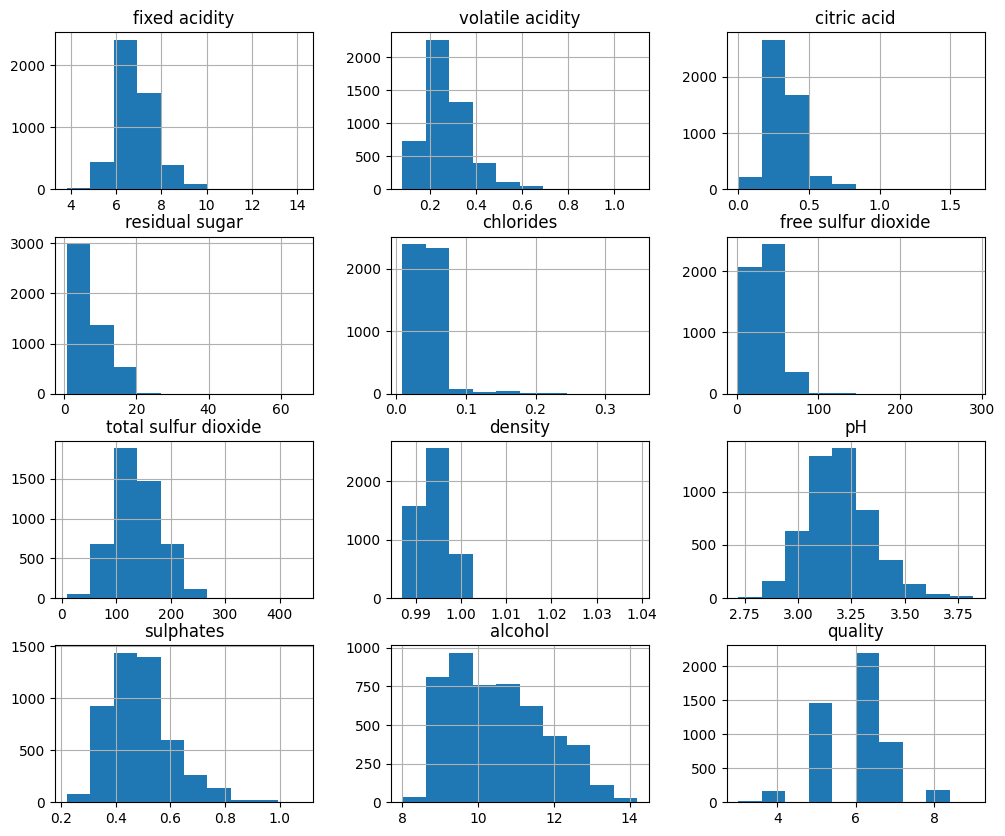

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the winequality-white dataset
data = pd.read_csv("winequality-white.csv", sep=';')

# Define features (X) and target (y)
X = data.drop('quality', axis=1).values  # All columns except 'quality' as features
y = data['quality'].values  # 'quality' column as the target

# Add bias term to features (optional, depending on the model requirements)
X = np.c_[np.ones(X.shape[0]), X]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare binary classification
# Classify wines as either good (quality > 5) or bad (quality <= 5)
y_binary = (y > 5).astype(int)  # Convert to binary labels
y_binary = y_binary.reshape(-1, 1)  # Reshape for compatibility

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Statistical summary
print(data.describe())
# Visualize distributions of numerical features
data.hist(figsize=(12, 10))
plt.show()
data.head()


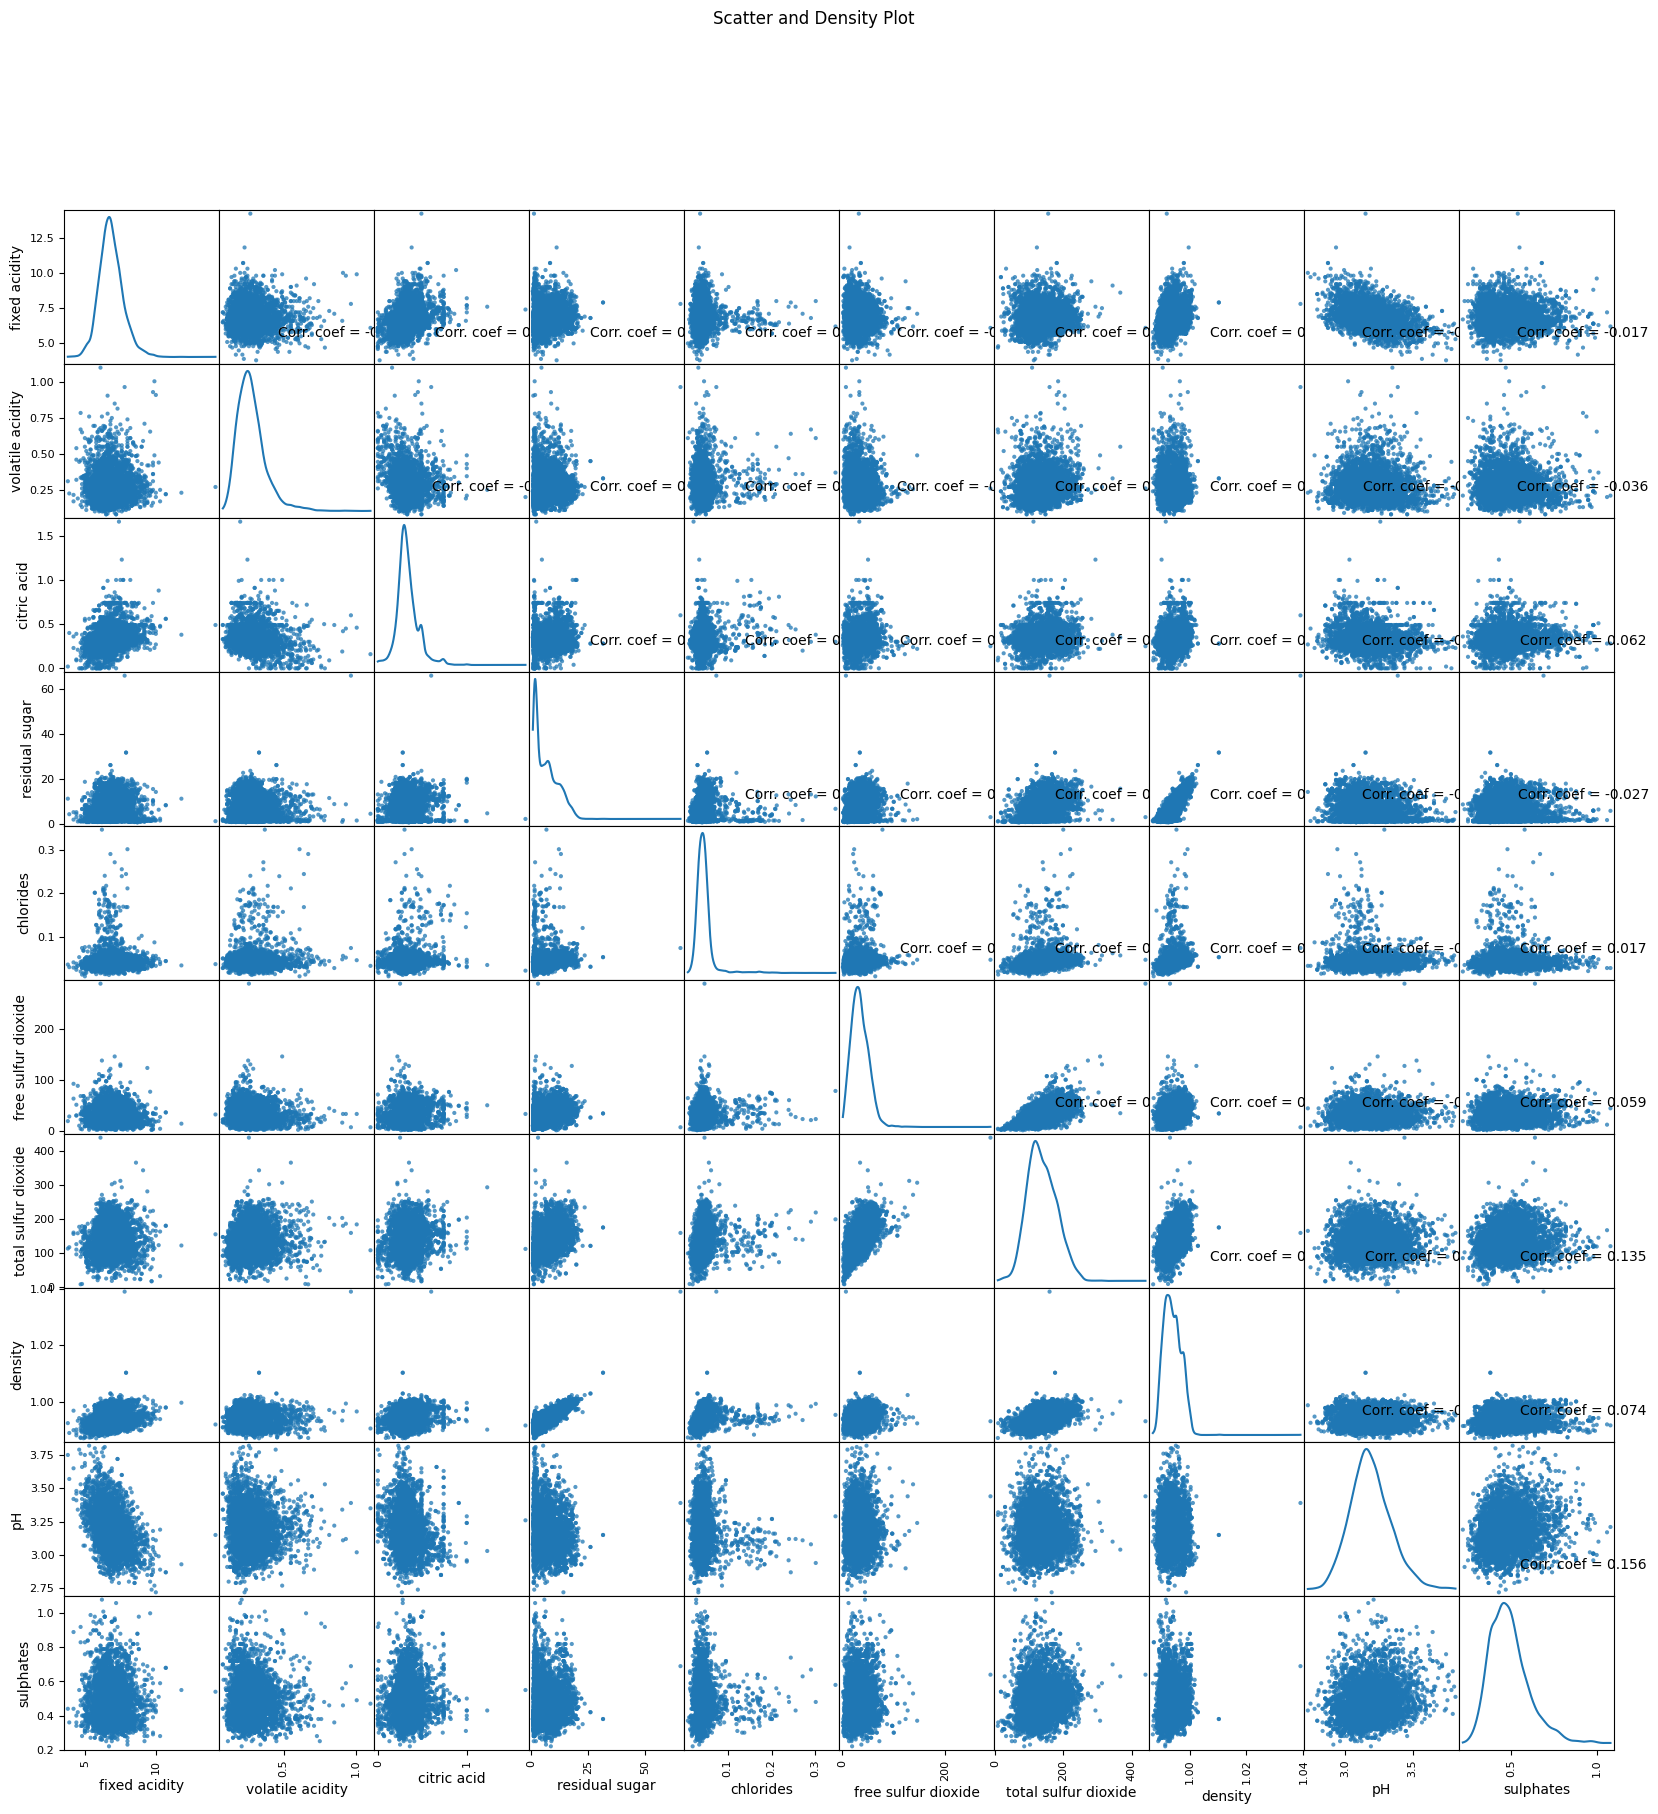

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns') # Changed 'columns' to axis='columns'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(data, 20, 10)

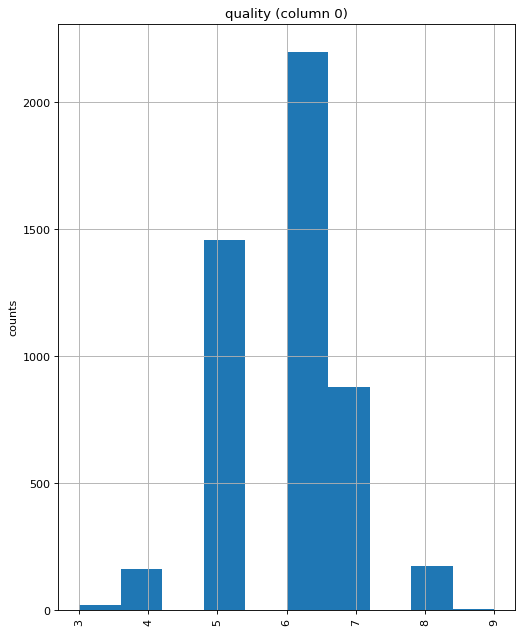

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    # Use floor division to ensure nGraphRow is an integer
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotPerColumnDistribution(data, 10, 5)

# Display first few rows of the dataset
print(data.head())


###Gradient Descent

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

###Loss function

In [ ]:
def loss_function(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))


###Partial derivatives

In [ ]:
def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    return dw


### Gradient Descent Update Rule

In [ ]:
def gradient_descent(X, y, alpha, iterations):
    m, n = X.shape
    w = np.zeros((n, 1))  # Initialize weights
    losses = []

    for i in range(iterations):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = loss_function(y, y_pred)
        losses.append(loss)

        dw = compute_gradients(X, y, y_pred)
        w -= alpha * dw  # Update weights

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return w, losses

Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.6438
Iteration 200: Loss = 0.6226
Iteration 300: Loss = 0.6104
Iteration 400: Loss = 0.6022
Iteration 500: Loss = 0.5963
Iteration 600: Loss = 0.5919
Iteration 700: Loss = 0.5884
Iteration 800: Loss = 0.5857
Iteration 900: Loss = 0.5835


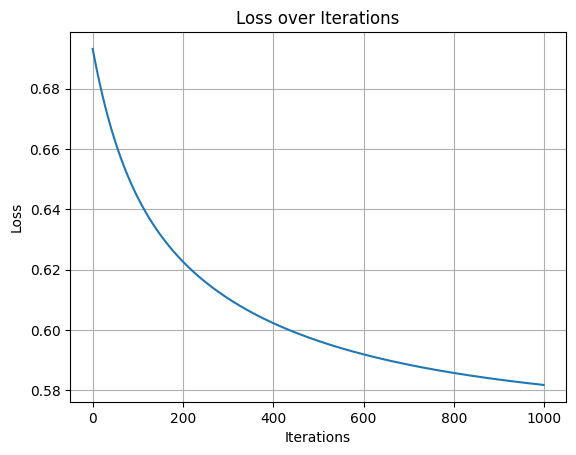

Accuracy on test set: 70.00%


In [ ]:
threshold = 5  # Define the threshold here
y_binary = (y > threshold).astype(int)  # Convert to binary labels
y_binary = y_binary.reshape(-1, 1)  # Reshape for compatibility

# Proceed to split the dataset without issues
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example usage
w, losses = gradient_descent(X_train_scaled, y_train, alpha=0.01, iterations=1000)

# Plot loss over iterations
plt.plot(losses)
plt.title("Loss over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Optional: Evaluate the model on the test set
y_test_pred = sigmoid(np.dot(X_test_scaled, w))  # Predictions on test set
y_test_pred_binary = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = np.mean(y_test_pred_binary.flatten() == y_test.flatten())
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

##Code

Training with BatchGD...
BatchGD took 21.90 seconds
Training with SGD...
SGD took 18.32 seconds
Training with MiniBatchGD...
MiniBatchGD took 17.05 seconds
Training with Momentum...
Momentum took 18.96 seconds
Training with Adagrad...
Adagrad took 20.87 seconds
Training with RMSprop...
RMSprop took 22.16 seconds
Training with Adam...
Adam took 24.34 seconds


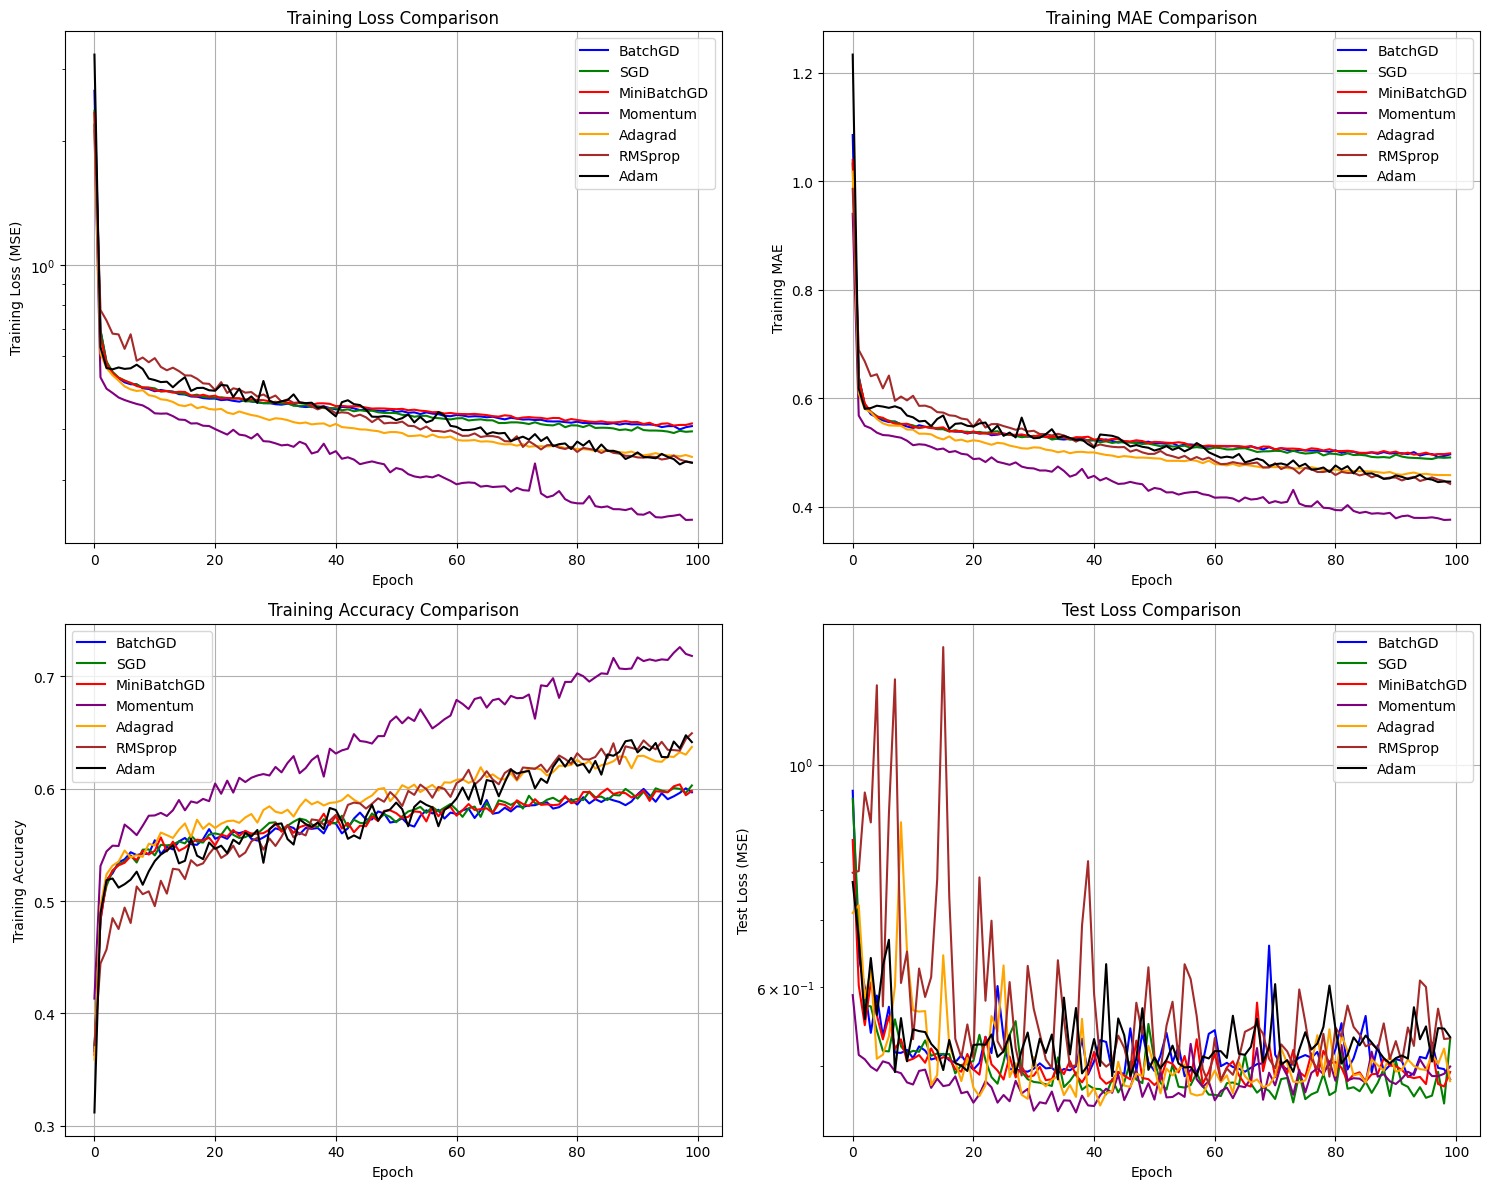


Final Test Metrics:
BatchGD - Test MAE: 0.538552, Test Accuracy: 0.559184
SGD - Test MAE: 0.558359, Test Accuracy: 0.542857
MiniBatchGD - Test MAE: 0.545395, Test Accuracy: 0.554082
Momentum - Test MAE: 0.531184, Test Accuracy: 0.569388
Adagrad - Test MAE: 0.540406, Test Accuracy: 0.557143
RMSprop - Test MAE: 0.551867, Test Accuracy: 0.562245
Adam - Test MAE: 0.558708, Test Accuracy: 0.545918


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import time
from typing import List, Tuple, Dict

class WineDataset(Dataset):
    def __init__(self, split='train'):
        # Load Wine Quality dataset
        url = "winequality-white.csv"
        data = pd.read_csv(url, sep=';')

        # Split features and target
        X = data.drop('quality', axis=1).values
        y = data['quality'].values

        # Scale features
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Convert to tensors
        if split == 'train':
            self.X = torch.FloatTensor(X_train)
            self.y = torch.FloatTensor(y_train).reshape(-1, 1)
        else:
            self.X = torch.FloatTensor(X_test)
            self.y = torch.FloatTensor(y_test).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class WineQualityModel(nn.Module):
    def __init__(self, input_size=11):
        super(WineQualityModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

class OptimizerComparison:
    def __init__(self, num_epochs: int = 100, batch_size: int = 32):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.num_epochs = num_epochs
        self.batch_size = batch_size

        # Create datasets
        self.train_dataset = WineDataset('train')
        self.test_dataset = WineDataset('test')

        # Create data loaders
        self.train_loader = DataLoader(
            self.train_dataset,
            batch_size=batch_size,
            shuffle=True
        )

        self.test_loader = DataLoader(
            self.test_dataset,
            batch_size=len(self.test_dataset),
            shuffle=False
        )

        self.criterion = nn.MSELoss()

    def evaluate_model(self, model: nn.Module) -> Tuple[float, float, float]:
        model.eval()
        total_loss = 0
        total_mae = 0
        total_accuracy = 0
        total_samples = 0

        with torch.no_grad():
            for X, y in self.test_loader:
                X, y = X.to(self.device), y.to(self.device)
                y_pred = model(X)

                loss = self.criterion(y_pred, y)
                total_loss += loss.item()

                # Mean Absolute Error
                mae = torch.mean(torch.abs(y_pred - y))
                total_mae += mae.item()

                # Accuracy (considering quality >= 6 as "good" wine)
                y_pred_class = torch.round(y_pred).clamp(1, 10)  # rounding and clamping to be within bounds
                correct = (y_pred_class == y).float().sum()
                total_accuracy += correct.item()

                total_samples += y.size(0)

        avg_loss = total_loss / len(self.test_loader)
        avg_mae = total_mae / len(self.test_loader)
        accuracy = total_accuracy / total_samples

        return avg_loss, avg_mae, accuracy

    def train_model(self, optimizer_name: str, **optimizer_params) -> Tuple[List[float], List[float], List[float], List[float]]:
        model = WineQualityModel().to(self.device)

        # Initialize optimizer based on name
        optimizer = None
        loader = self.train_loader
        if optimizer_name == "SGD":
            optimizer = torch.optim.SGD(model.parameters(), **optimizer_params)
        elif optimizer_name == "BatchGD":
            optimizer = torch.optim.SGD(model.parameters(), **optimizer_params)
        elif optimizer_name == "MiniBatchGD":
            optimizer = torch.optim.SGD(model.parameters(), **optimizer_params)
        elif optimizer_name == "Momentum":
            optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, **optimizer_params)
        elif optimizer_name == "Adagrad":
            optimizer = torch.optim.Adagrad(model.parameters(), **optimizer_params)
        elif optimizer_name == "RMSprop":
            optimizer = torch.optim.RMSprop(model.parameters(), **optimizer_params)
        elif optimizer_name == "Adam":
            optimizer = torch.optim.Adam(model.parameters(), **optimizer_params)
        else:
            raise ValueError(f"Unknown optimizer: {optimizer_name}")

        train_losses = []
        train_maes = []
        train_accuracies = []
        test_losses = []
        test_maes = []
        test_accuracies = []

        for epoch in range(self.num_epochs):
            model.train()
            epoch_loss = 0
            epoch_mae = 0
            epoch_accuracy = 0
            num_batches = 0

            for X, y in loader:
                X, y = X.to(self.device), y.to(self.device)

                # Forward pass
                y_pred = model(X)
                loss = self.criterion(y_pred, y)

                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()
                epoch_mae += torch.mean(torch.abs(y_pred - y)).item()

                # Training Accuracy
                y_pred_class = torch.round(y_pred).clamp(1, 10)
                correct = (y_pred_class == y).float().sum()
                epoch_accuracy += correct.item()

                num_batches += 1

            avg_train_loss = epoch_loss / num_batches
            avg_train_mae = epoch_mae / num_batches
            avg_train_accuracy = epoch_accuracy / (num_batches * self.batch_size)

            avg_test_loss, avg_test_mae, avg_test_accuracy = self.evaluate_model(model)

            train_losses.append(avg_train_loss)
            train_maes.append(avg_train_mae)
            train_accuracies.append(avg_train_accuracy)
            test_losses.append(avg_test_loss)
            test_maes.append(avg_test_mae)
            test_accuracies.append(avg_test_accuracy)

        return train_losses, train_maes, train_accuracies, test_losses, test_maes, test_accuracies

    def run_comparison(self) -> Dict[str, Tuple[List[float], List[float], List[float]]]:
        optimizers = {
            "BatchGD": {"lr": 0.01},
            "SGD": {"lr": 0.01},
            "MiniBatchGD": {"lr": 0.01},
            "Momentum": {"lr": 0.01},
            "Adagrad": {"lr": 0.1},
            "RMSprop": {"lr": 0.01},
            "Adam": {"lr": 0.01}
        }

        results = {}

        for name, params in optimizers.items():
            print(f"Training with {name}...")
            start_time = time.time()
            train_losses, train_maes, train_accuracies, test_losses, test_maes, test_accuracies = self.train_model(name, **params)
            end_time = time.time()
            print(f"{name} took {end_time - start_time:.2f} seconds")
            results[name] = (train_losses, train_maes, train_accuracies, test_losses, test_maes, test_accuracies)

        return results

    def plot_results(self, results: Dict[str, Tuple[List[float], List[float], List[float]]]):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        colors = {
            "BatchGD": "blue",
            "SGD": "green",
            "MiniBatchGD": "red",
            "Momentum": "purple",
            "Adagrad": "orange",
            "RMSprop": "brown",
            "Adam": "black"
        }

        # Plot Training Loss
        for name, (train_losses, _, _, _, _, _) in results.items():
            ax1.plot(train_losses, label=name, color=colors[name])
        ax1.set_xlabel("Epoch")
        ax1.set_ylabel("Training Loss (MSE)")
        ax1.set_title("Training Loss Comparison")
        ax1.legend()
        ax1.grid(True)
        ax1.set_yscale('log')

        # Plot Training MAE
        for name, (_, train_maes, _, _, _, _) in results.items():
            ax2.plot(train_maes, label=name, color=colors[name])
        ax2.set_xlabel("Epoch")
        ax2.set_ylabel("Training MAE")
        ax2.set_title("Training MAE Comparison")
        ax2.legend()
        ax2.grid(True)

        # Plot Training Accuracy
        for name, (_, _, train_accuracies, _, _, _) in results.items():
            ax3.plot(train_accuracies, label=name, color=colors[name])
        ax3.set_xlabel("Epoch")
        ax3.set_ylabel("Training Accuracy")
        ax3.set_title("Training Accuracy Comparison")
        ax3.legend()
        ax3.grid(True)

        # Plot Test Loss
        for name, (_, _, _, test_losses, _, _) in results.items():
            ax4.plot(test_losses, label=name, color=colors[name])
        ax4.set_xlabel("Epoch")
        ax4.set_ylabel("Test Loss (MSE)")
        ax4.set_title("Test Loss Comparison")
        ax4.legend()
        ax4.grid(True)
        ax4.set_yscale('log')

        plt.tight_layout()
        plt.show()

def main():
    # Set random seeds for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)

    # Initialize and run comparison
    comparison = OptimizerComparison(num_epochs=100, batch_size=32)
    results = comparison.run_comparison()

    # Plot results
    comparison.plot_results(results)

    # Print final test metrics
    print("\nFinal Test Metrics:")
    for name, (_, _, _, _, test_maes, test_accuracies) in results.items():
        print(f"{name} - Test MAE: {test_maes[-1]:.6f}, Test Accuracy: {test_accuracies[-1]:.6f}")

if __name__ == "__main__":
    main()

Training with BatchGD...
BatchGD took 21.50 seconds
Training with SGD...
SGD took 17.80 seconds
Training with MiniBatchGD...
MiniBatchGD took 17.52 seconds
Training with Momentum...
Momentum took 19.27 seconds
Training with Adagrad...
Adagrad took 20.73 seconds
Training with RMSprop...
RMSprop took 22.14 seconds
Training with Adam...
Adam took 24.17 seconds

Generating plots for each optimizer...


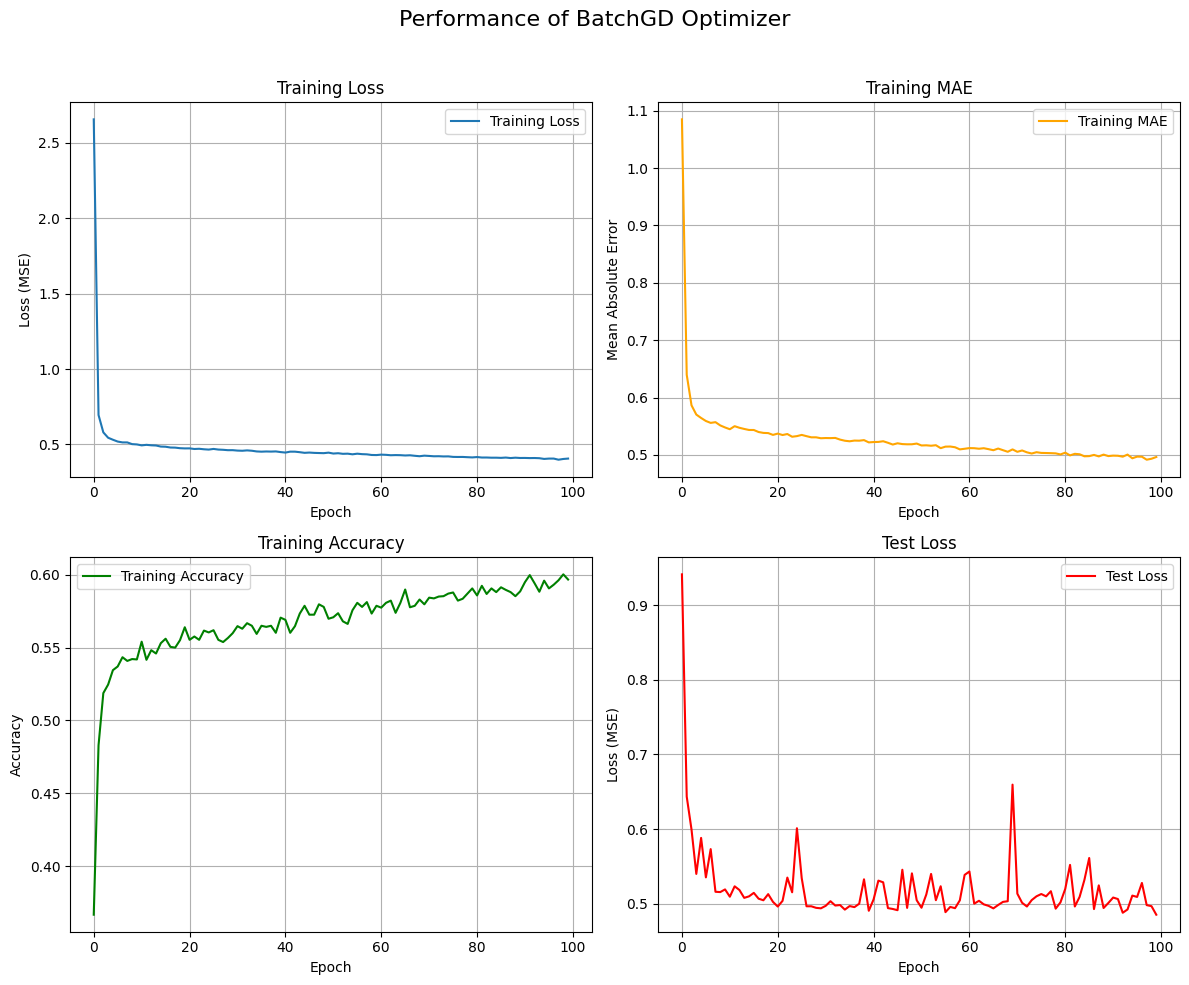

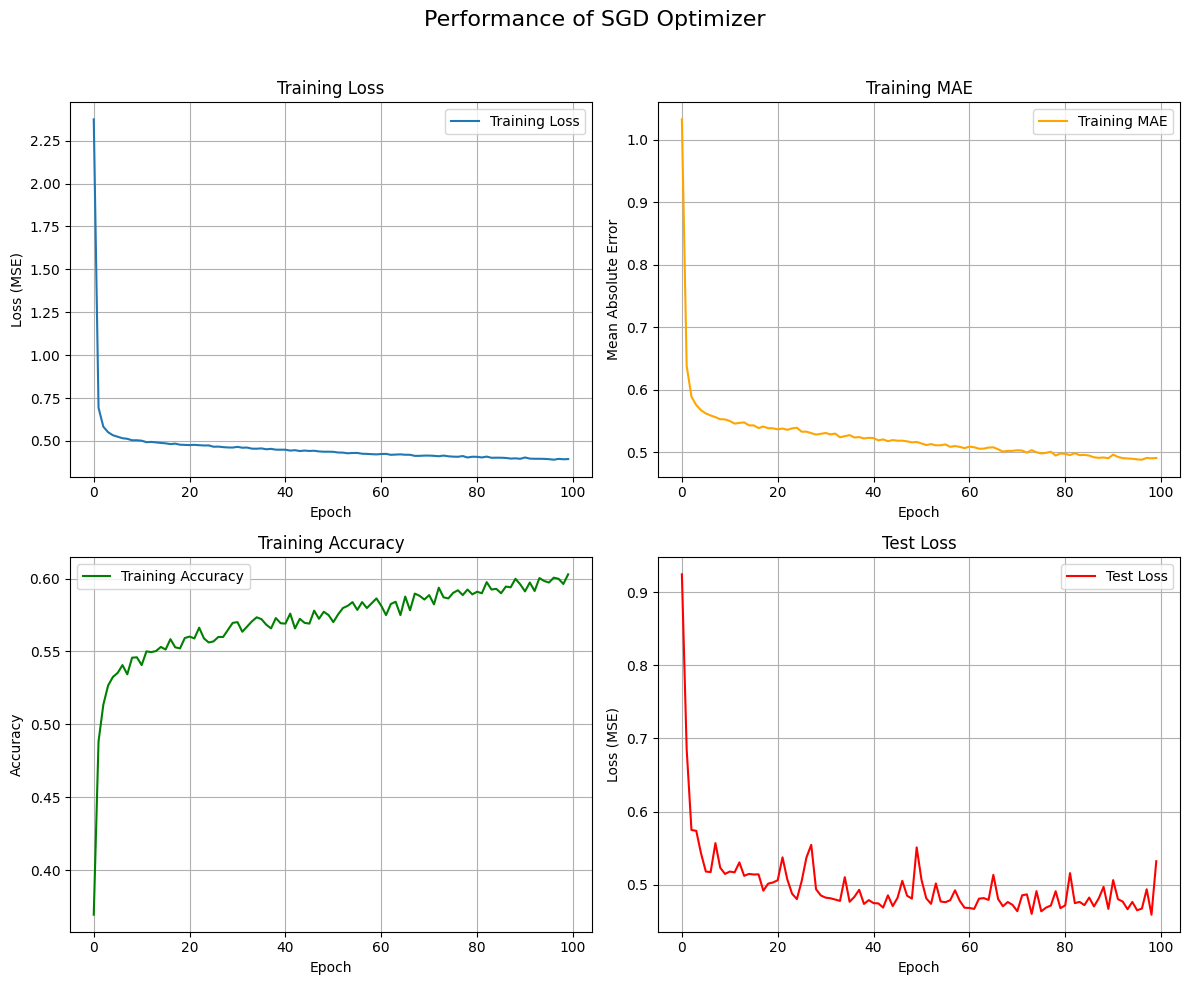

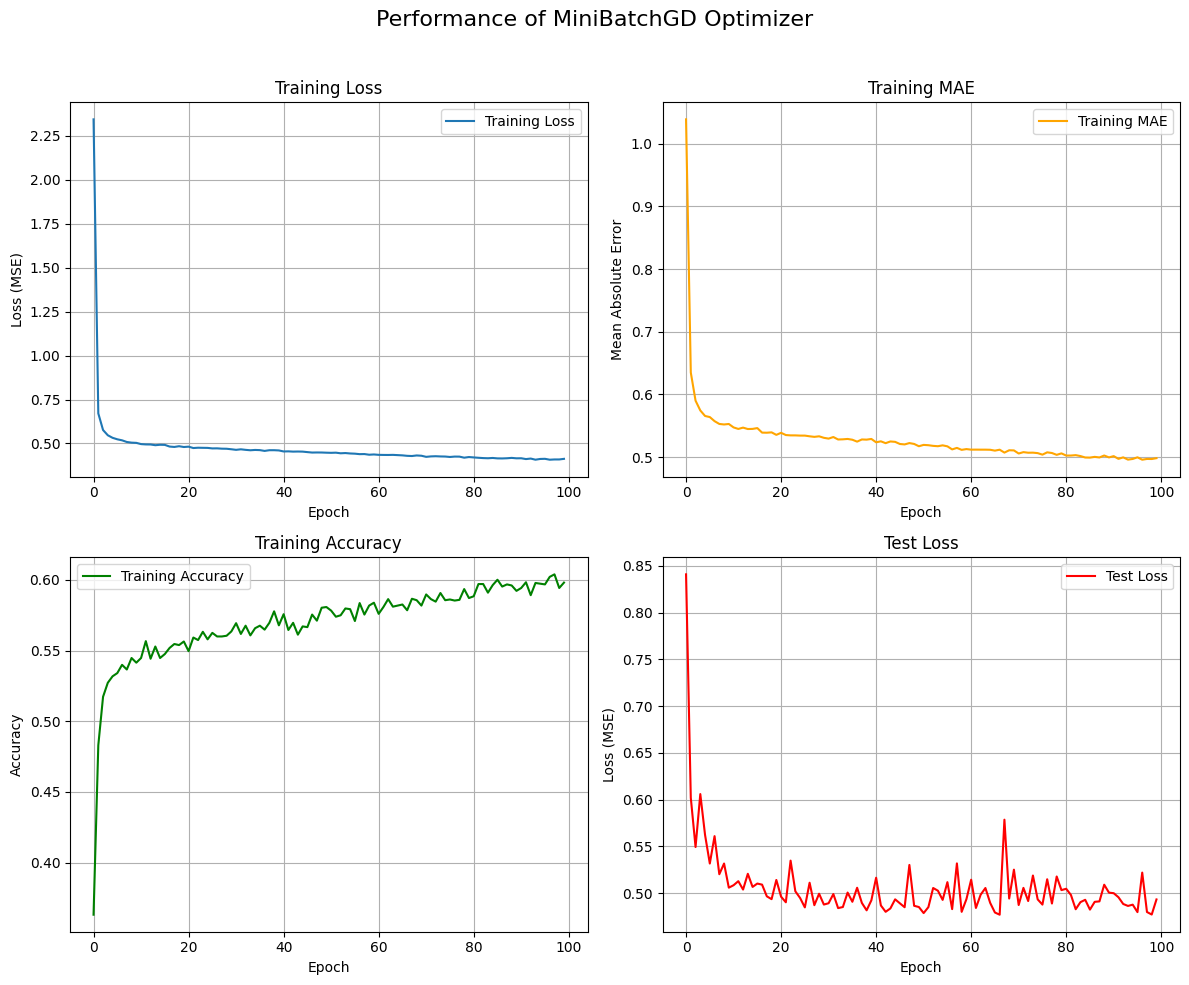

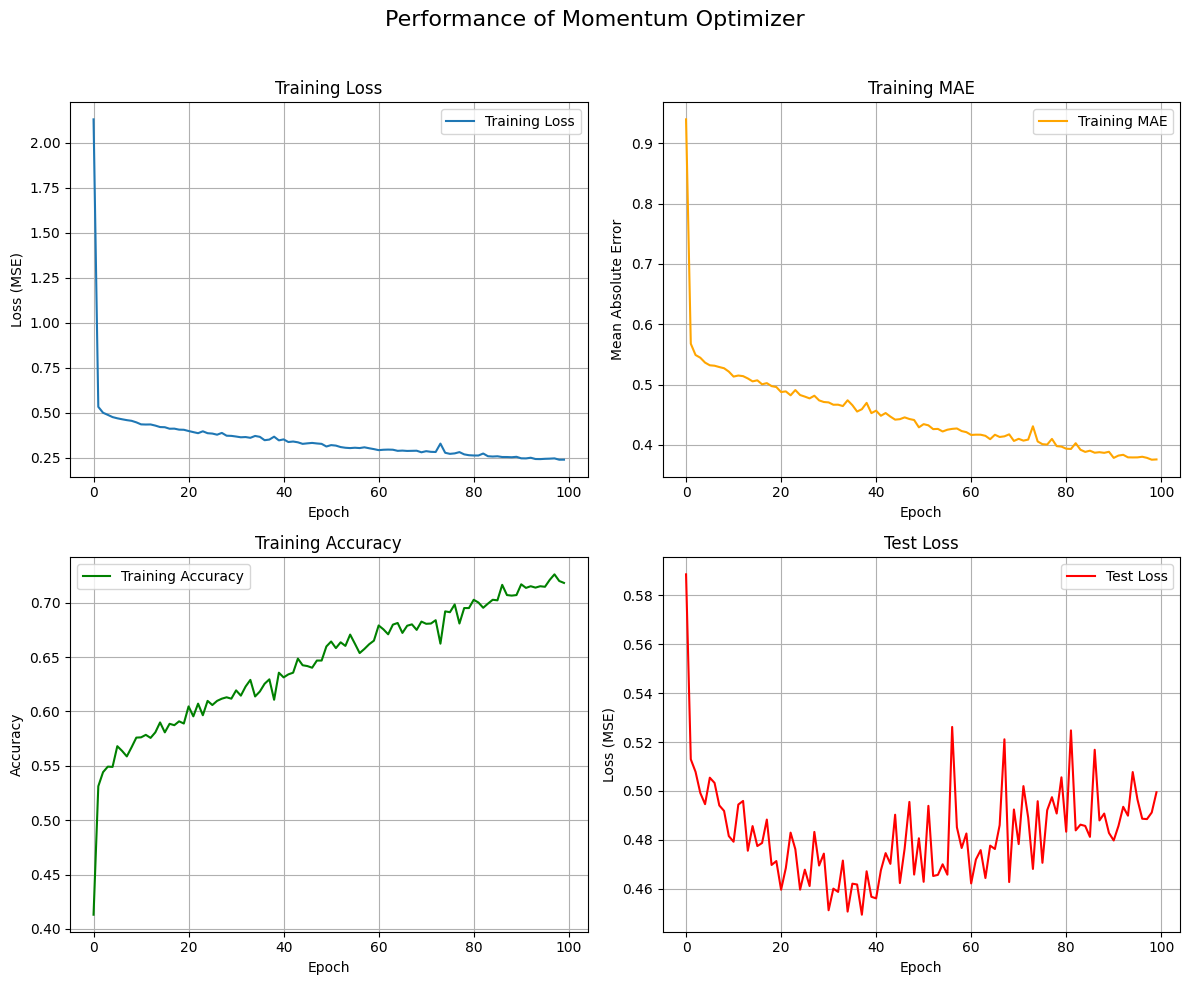

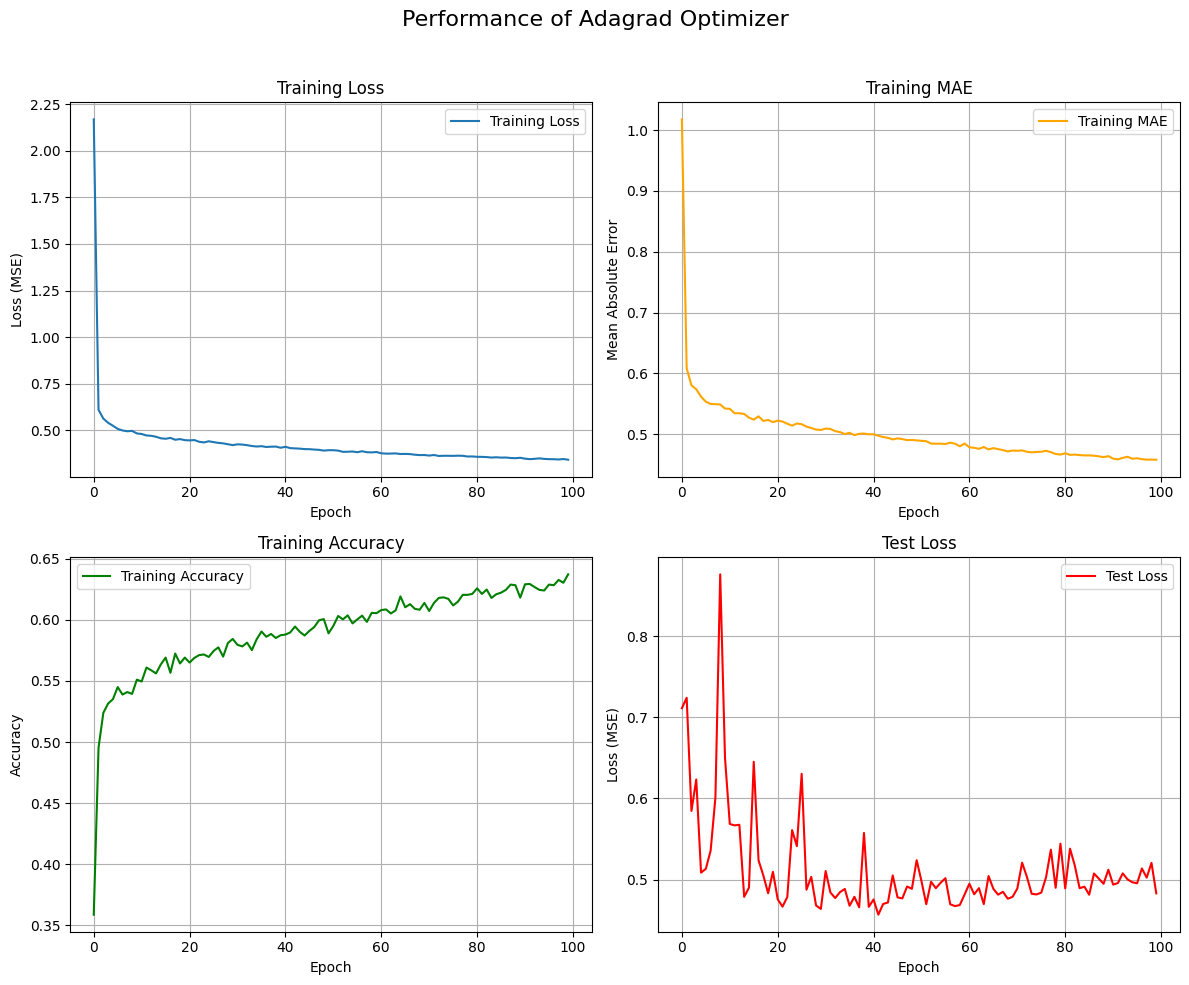

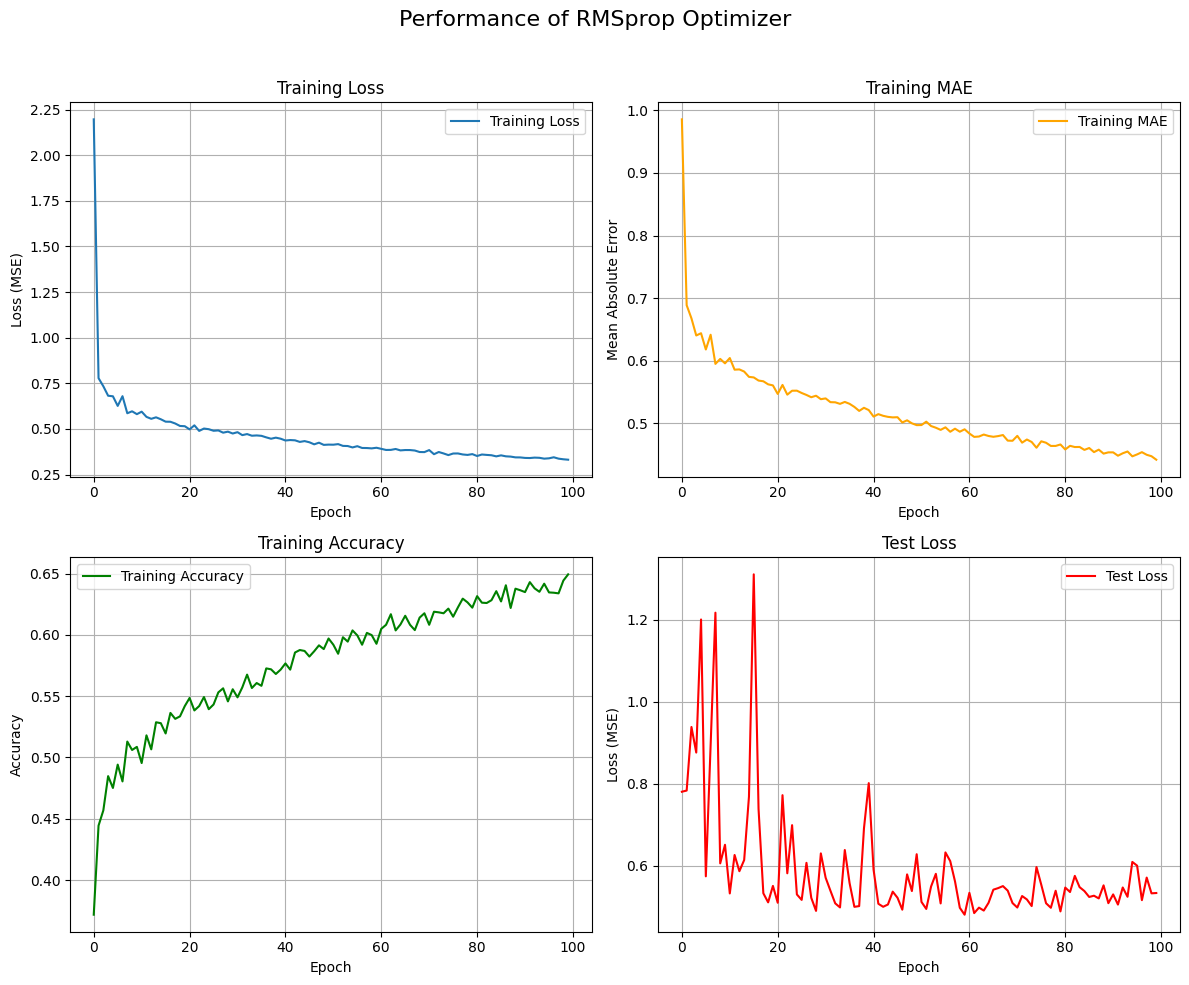

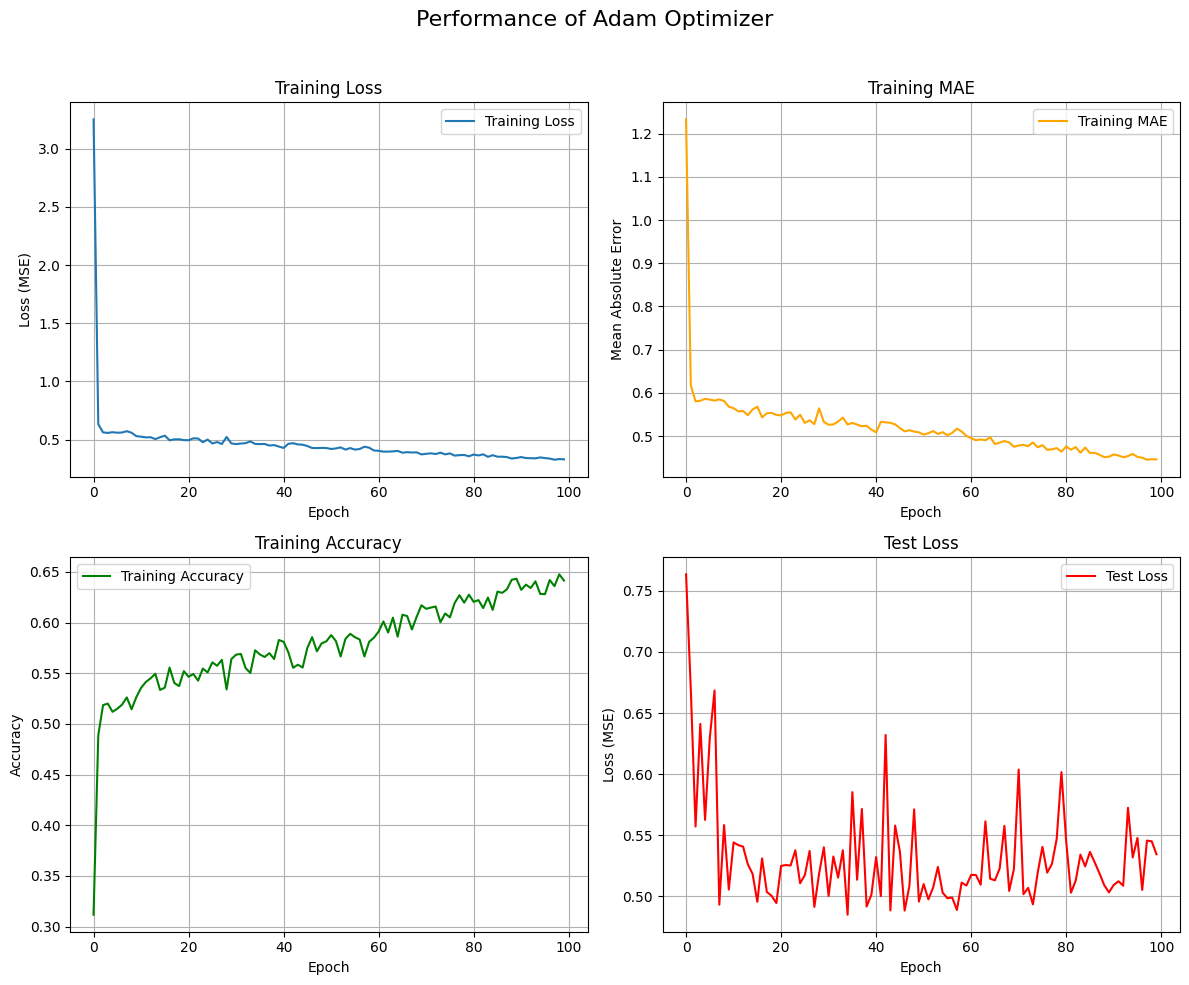


Final Test Metrics:
BatchGD - Test MAE: 0.538552, Test Accuracy: 0.559184
SGD - Test MAE: 0.558359, Test Accuracy: 0.542857
MiniBatchGD - Test MAE: 0.545395, Test Accuracy: 0.554082
Momentum - Test MAE: 0.531184, Test Accuracy: 0.569388
Adagrad - Test MAE: 0.540406, Test Accuracy: 0.557143
RMSprop - Test MAE: 0.551867, Test Accuracy: 0.562245
Adam - Test MAE: 0.558708, Test Accuracy: 0.545918


In [ ]:
def plot_optimizer_results(
    optimizer_name: str,
    train_losses: List[float],
    train_maes: List[float],
    train_accuracies: List[float],
    test_losses: List[float],
    test_maes: List[float],
    test_accuracies: List[float]
):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Performance of {optimizer_name} Optimizer", fontsize=16)

    # Training Loss
    axs[0, 0].plot(train_losses, label="Training Loss")
    axs[0, 0].set_title("Training Loss")
    axs[0, 0].set_xlabel("Epoch")
    axs[0, 0].set_ylabel("Loss (MSE)")
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Training MAE
    axs[0, 1].plot(train_maes, label="Training MAE", color="orange")
    axs[0, 1].set_title("Training MAE")
    axs[0, 1].set_xlabel("Epoch")
    axs[0, 1].set_ylabel("Mean Absolute Error")
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # Training Accuracy
    axs[1, 0].plot(train_accuracies, label="Training Accuracy", color="green")
    axs[1, 0].set_title("Training Accuracy")
    axs[1, 0].set_xlabel("Epoch")
    axs[1, 0].set_ylabel("Accuracy")
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # Test Loss
    axs[1, 1].plot(test_losses, label="Test Loss", color="red")
    axs[1, 1].set_title("Test Loss")
    axs[1, 1].set_xlabel("Epoch")
    axs[1, 1].set_ylabel("Loss (MSE)")
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to include title
    plt.show()
def plot_results(self, results: Dict[str, Tuple[List[float], List[float], List[float]]]):
    for name, (train_losses, train_maes, train_accuracies, test_losses, test_maes, test_accuracies) in results.items():
        plot_optimizer_results(
            optimizer_name=name,
            train_losses=train_losses,
            train_maes=train_maes,
            train_accuracies=train_accuracies,
            test_losses=test_losses,
            test_maes=test_maes,
            test_accuracies=test_accuracies
        )
def main():
    # Set random seeds for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)

    # Initialize and run the optimizer comparison
    comparison = OptimizerComparison(num_epochs=100, batch_size=32)
    results = comparison.run_comparison()

    # Plot the results for each optimizer
    print("\nGenerating plots for each optimizer...")
    for name, (train_losses, train_maes, train_accuracies, test_losses, test_maes, test_accuracies) in results.items():
        plot_optimizer_results(
            optimizer_name=name,
            train_losses=train_losses,
            train_maes=train_maes,
            train_accuracies=train_accuracies,
            test_losses=test_losses,
            test_maes=test_maes,
            test_accuracies=test_accuracies
        )

    # Print final test metrics for comparison
    print("\nFinal Test Metrics:")
    for name, (_, _, _, _, test_maes, test_accuracies) in results.items():
        print(f"{name} - Test MAE: {test_maes[-1]:.6f}, Test Accuracy: {test_accuracies[-1]:.6f}")

if __name__ == "__main__":
    main()


#**Question 2:**

##Preproceessing


Dataset Overview:
--------------------------------------------------
Number of records: 3322
Number of features: 15

Columns in the dataset:
['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']

Basic Statistics:
--------------------------------------------------
        Prev Close         Open         High          Low         Last  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean    344.114314   344.763019   351.608007   337.531969   344.239539   
std     192.936882   193.619992   198.617808   188.676614   193.187813   
min     108.000000   108.000000   110.450000   105.650000   108.000000   
25%     164.312500   164.850000   168.000000   161.600000   164.075000   
50%     324.700000   325.750000   331.275000   319.850000   325.000000   
75%     400.912500   401.000000   407.187500   395.000000   400.912500   
max    1307.450000  1310.250000  132

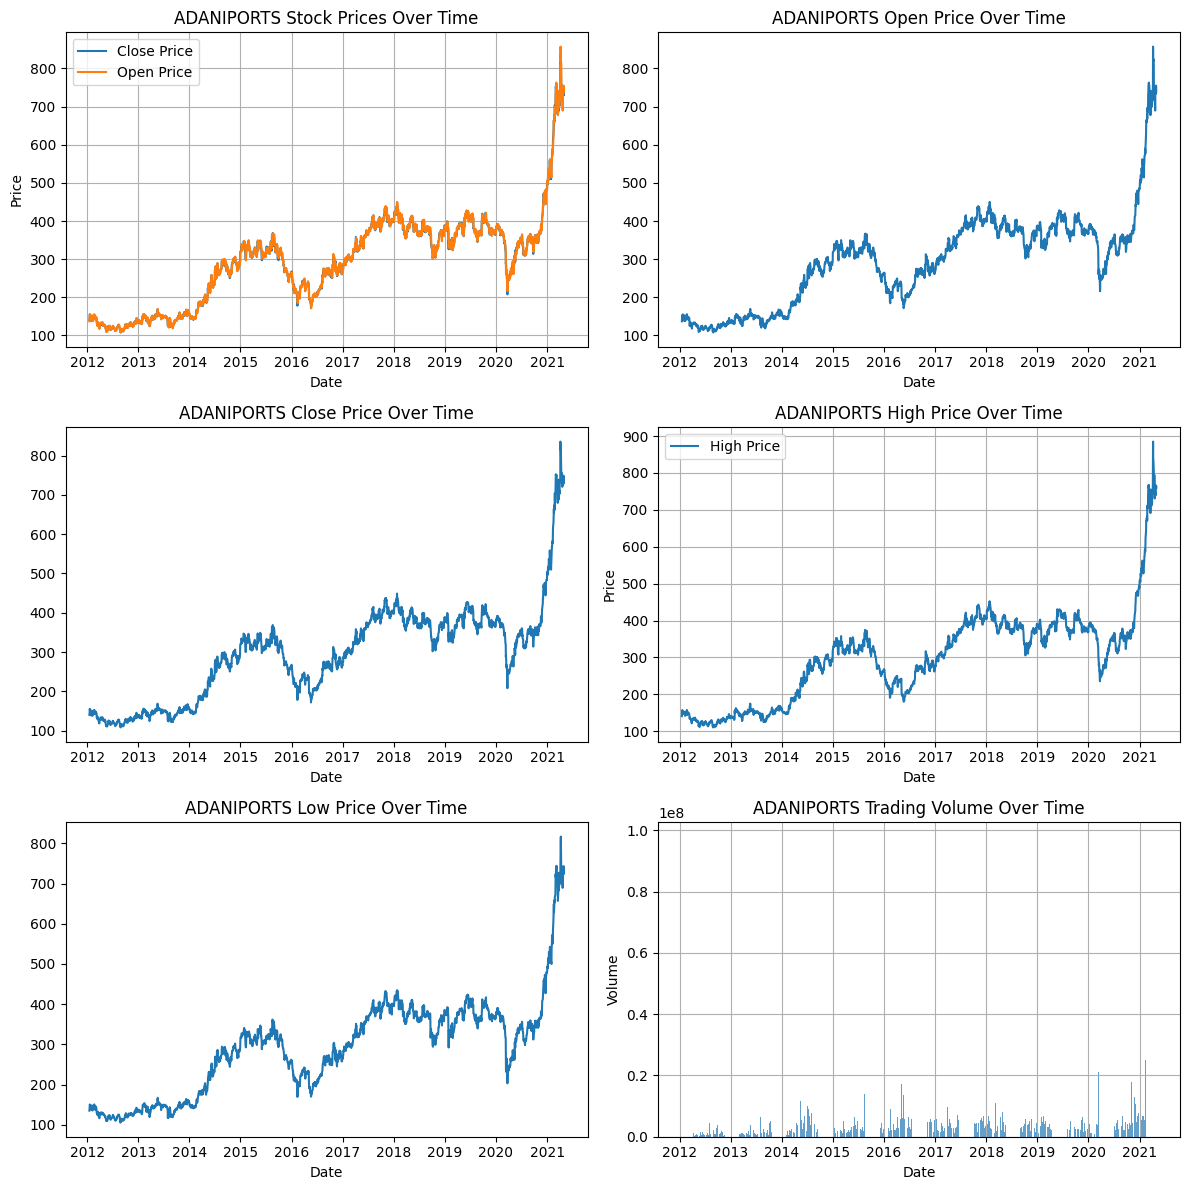

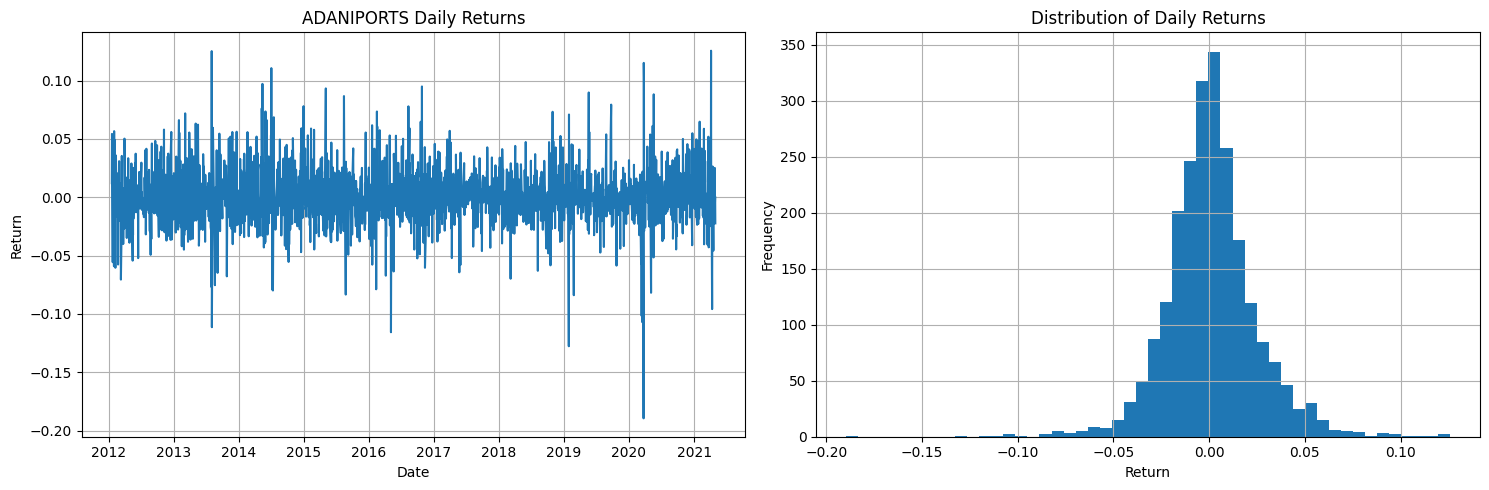

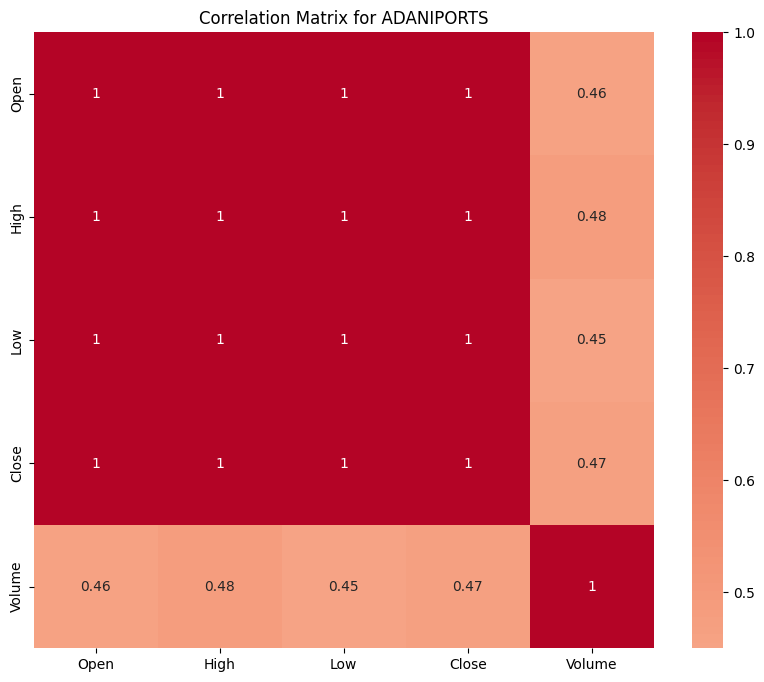

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DataExplorer:
    def __init__(self, file_path):
        self.file_path = file_path

    def load_and_explore(self):
        """Load and perform initial data exploration"""
        # Load the data
        data = pd.read_csv(self.file_path)

        # Display basic information
        print("\nDataset Overview:")
        print("-" * 50)
        print(f"Number of records: {len(data)}")
        print(f"Number of features: {len(data.columns)}")
        print("\nColumns in the dataset:")
        print(data.columns.tolist())

        # Display basic statistics
        print("\nBasic Statistics:")
        print("-" * 50)
        print(data.describe())

        # Check for missing values
        print("\nMissing Values:")
        print("-" * 50)
        print(data.isnull().sum())

        # Get unique symbols
        print("\nUnique Symbols in Dataset:")
        print("-" * 50)
        symbols = data['Symbol'].unique()
        print(f"Number of unique symbols: {len(symbols)}")
        print("Sample symbols:", symbols[:5])

        return data

    def analyze_single_stock(self, data, symbol='ADANIPORTS'):
        """Analyze a single stock's data"""
        stock_data = data[data['Symbol'] == symbol].sort_values('Date')
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])

        # Print basic statistics for the stock
        print(f"\nAnalysis for {symbol}:")
        print("-" * 50)
        print(f"Trading period: {stock_data['Date'].min()} to {stock_data['Date'].max()}")
        print(f"Number of trading days: {len(stock_data)}")

        # Create price plot
        plt.figure(figsize=(12, 12))

        # Price subplot
        plt.subplot(3, 2, 1)
        plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
        plt.plot(stock_data['Date'], stock_data['Open'], label='Open Price')
        plt.title(f'{symbol} Stock Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)

        #Open
        plt.subplot(3, 2, 2)
        plt.plot(stock_data['Date'], stock_data['Open'], label='Open Price')
        plt.title(f'{symbol} Open Price Over Time')
        plt.xlabel('Date')

        #Close
        plt.subplot(3, 2, 3)
        plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
        plt.title(f'{symbol} Close Price Over Time')
        plt.xlabel('Date')

        # High
        plt.subplot(3, 2, 4)
        plt.plot(stock_data['Date'], stock_data['High'], label='High Price')
        plt.title(f'{symbol} High Price Over Time')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)

        # Low
        plt.subplot(3, 2, 5)
        plt.plot(stock_data['Date'], stock_data['Low'], label='Low Price')
        plt.title(f'{symbol} Low Price Over Time')
        plt.xlabel('Date')

        # Volume subplot
        plt.subplot(3, 2, 6)
        plt.bar(stock_data['Date'], stock_data['Volume'], alpha=0.7)
        plt.title(f'{symbol} Trading Volume Over Time')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Calculate and plot daily returns
        stock_data['Trades'] = stock_data['Close'].pct_change()

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.plot(stock_data['Date'], stock_data['Trades'])
        plt.title(f'{symbol} Daily Returns')
        plt.xlabel('Date')
        plt.ylabel('Return')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        stock_data['Trades'].hist(bins=50)
        plt.title('Distribution of Daily Returns')
        plt.xlabel('Return')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

        # Calculate correlations
        correlation_matrix = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title(f'Correlation Matrix for {symbol}')
        plt.show()

        return stock_data

# Usage example
if __name__ == "__main__":
    explorer = DataExplorer('ADANIPORTS.csv')
    data = explorer.load_and_explore()
    stock_data = explorer.analyze_single_stock(data, 'ADANIPORTS')

In [ ]:
!pip install tensorflow

###Model Evaluator

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

class DataPreprocessor:
    def __init__(self, file_path, symbol='ADANIPORTS', sequence_length=10):
        self.file_path = file_path
        self.symbol = symbol
        self.sequence_length = sequence_length
        self.scaler = MinMaxScaler()

    def load_data(self):
        data = pd.read_csv(self.file_path)
        stock_data = data[data['Symbol'] == self.symbol].sort_values('Date')

        # Extract features
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        stock_data['Day'] = stock_data['Date'].dt.day
        stock_data['Month'] = stock_data['Date'].dt.month
        stock_data['Dayofweek'] = stock_data['Date'].dt.dayofweek

        return stock_data

    def prepare_data(self, stock_data):
        features = ['Close', 'Volume', 'day', 'month', 'dayofweek']
        target = 'Open'

        # Scale features
        scaled_features = self.scaler.fit_transform(stock_data[features])
        scaled_target = self.scaler.fit_transform(stock_data[[target]])

        # Prepare data for different model types
        # Standard format for traditional models
        X_standard = scaled_features[:-1]
        y_standard = scaled_target[1:]

        # Sequence format for RNN
        X_sequences = []
        y_sequences = []
        for i in range(len(scaled_features) - self.sequence_length):
            X_sequences.append(scaled_features[i:(i + self.sequence_length)])
            y_sequences.append(scaled_target[i + self.sequence_length])

        X_sequences = np.array(X_sequences)
        y_sequences = np.array(y_sequences)

        return {
            'standard': (X_standard, y_standard),
            'sequence': (X_sequences, y_sequences),
            'features': features
        }

class ModelEvaluator:
    @staticmethod
    def plot_training_history(history, title):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{title} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        if 'accuracy' in history.history:
            plt.subplot(1, 2, 2)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.title(f'{title} - Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_predictions(y_true, y_pred, title):
        plt.figure(figsize=(10, 6))
        plt.plot(y_true, label='Actual', alpha=0.7)
        plt.plot(y_pred, label='Predicted', alpha=0.7)
        plt.title(f'{title} - Predictions vs Actual')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    @staticmethod
    def evaluate_model(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        return {
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }

def plot_learning_curves(model, X, y, title, cv=5):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y.ravel(),
        train_sizes=train_sizes,
        cv=TimeSeriesSplit(n_splits=cv),
        scoring='neg_mean_squared_error'
    )

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training')
    plt.plot(train_sizes, val_mean, label='Validation')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

    plt.title(f'Learning Curves - {title}')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

###Models and comparison


Training Linear Regression...


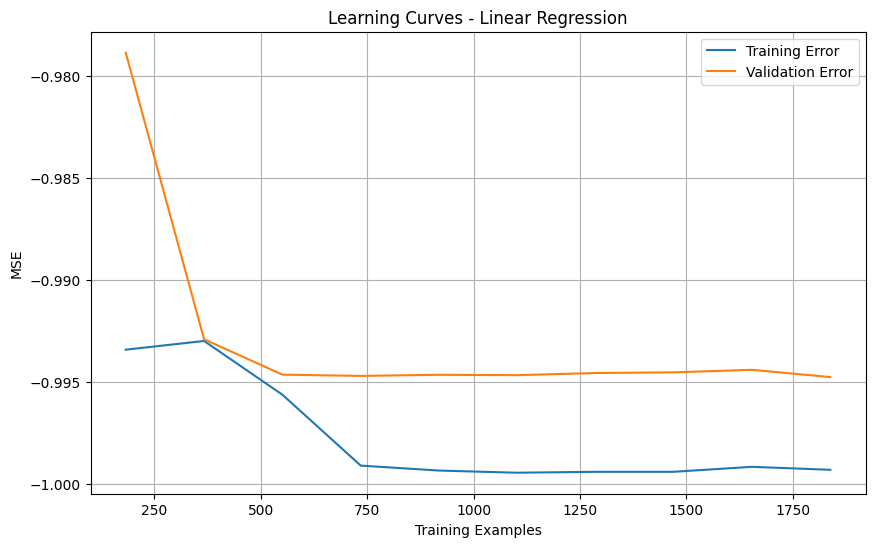

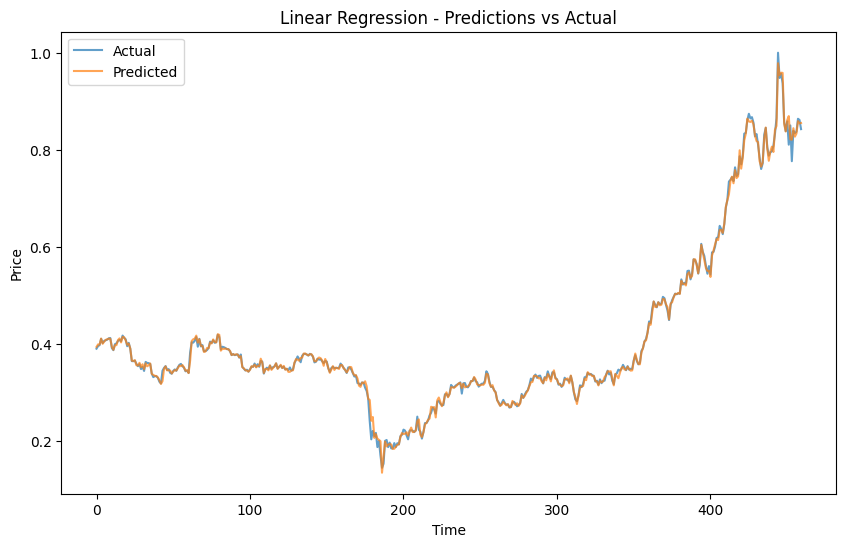


Training SVM...


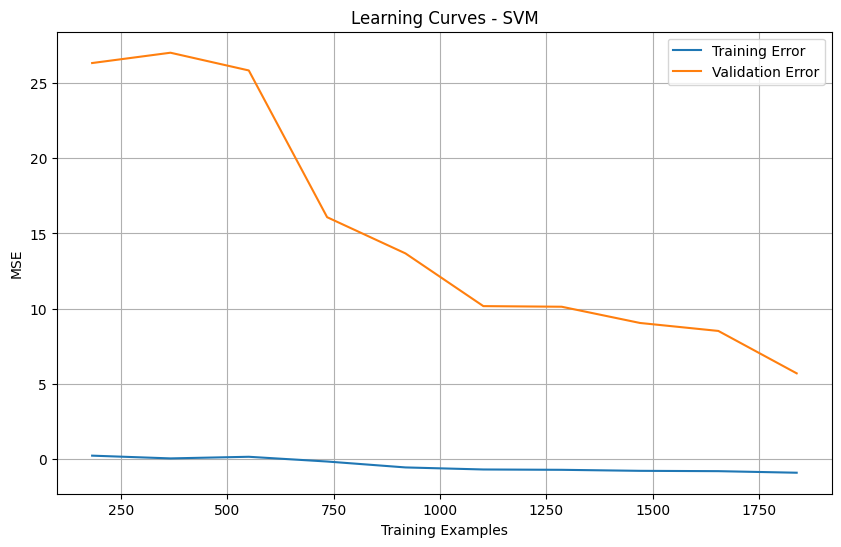

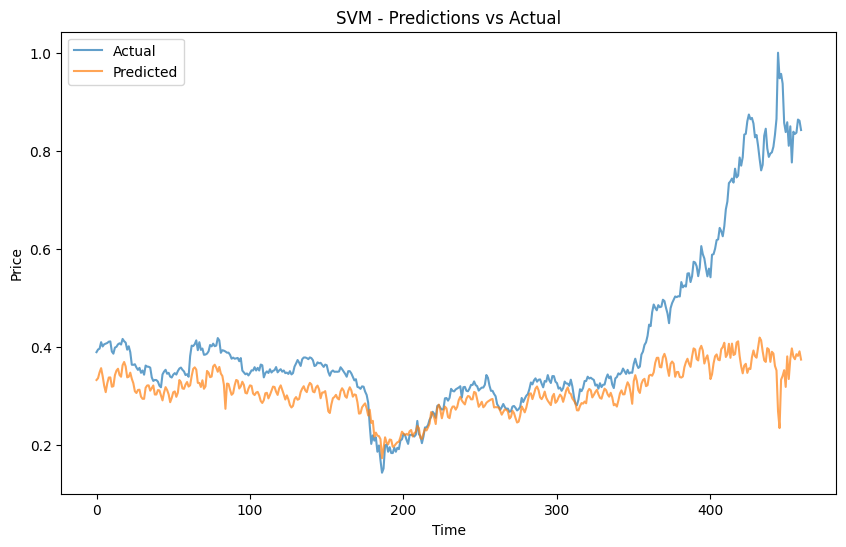


Training Decision Tree...


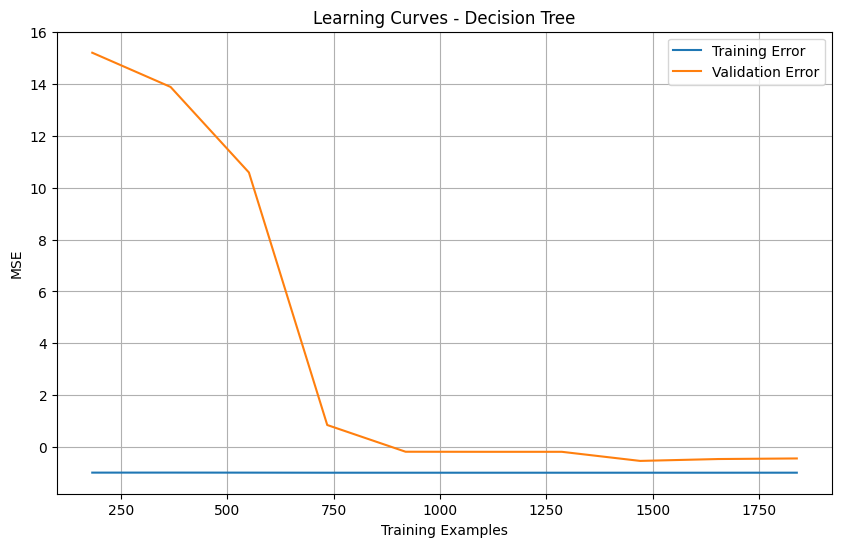

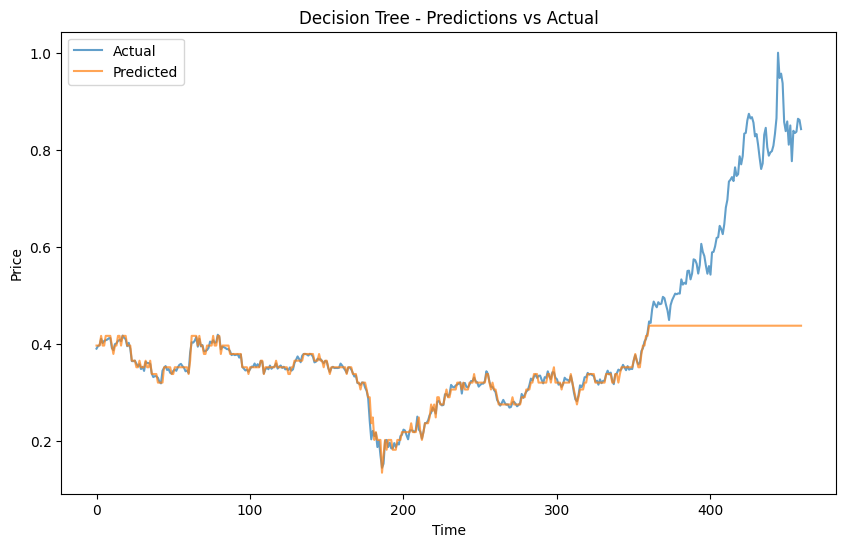


Training Random Forest...


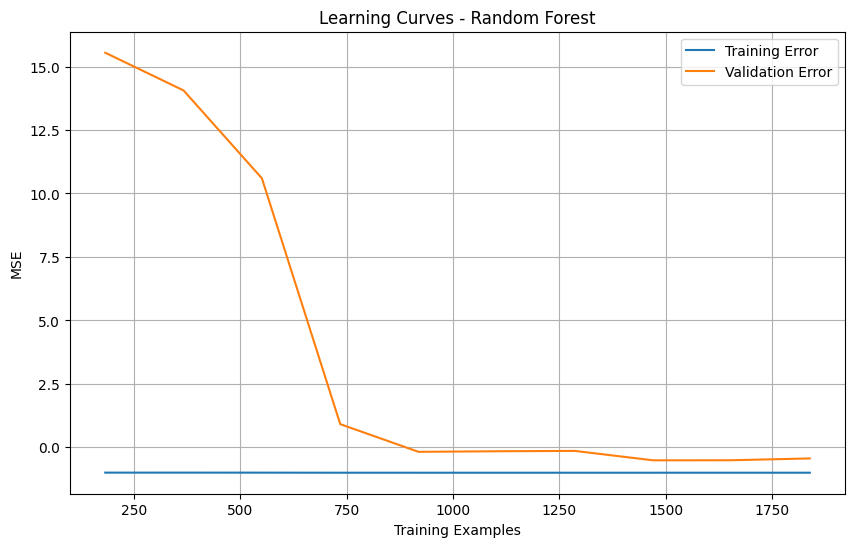

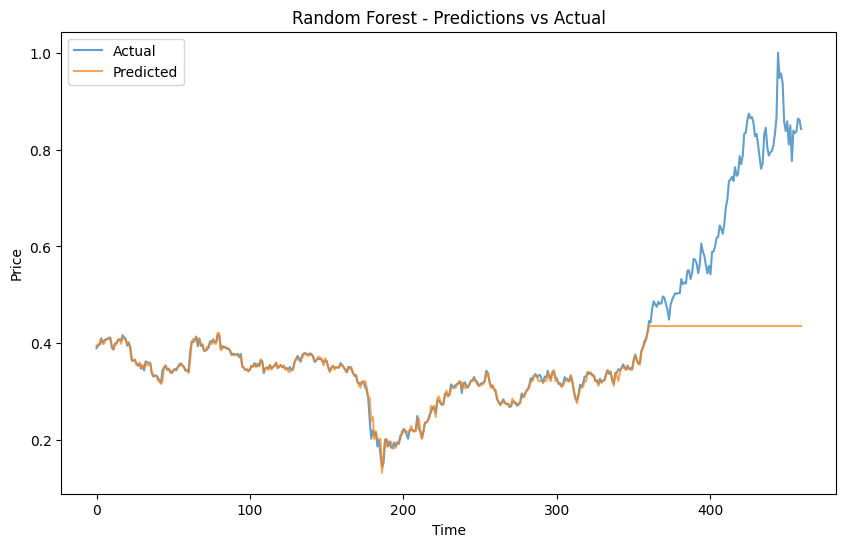


Training FNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


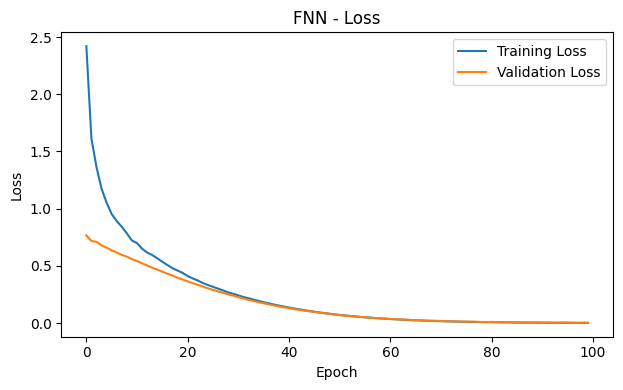

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Training RNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


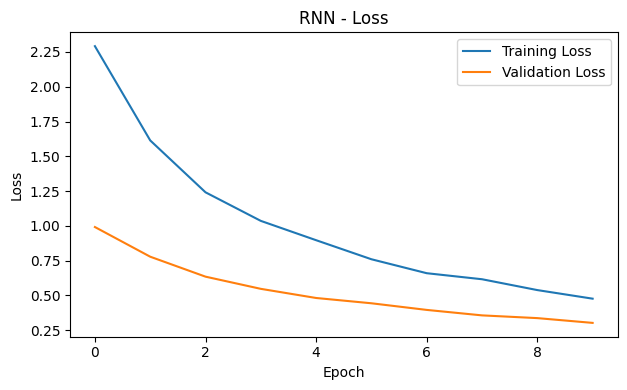

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Model Comparison:
                   Train MSE  Train RMSE  Train R2  Test MSE  Test RMSE  \
Linear Regression   0.000009    0.003027  0.999473  0.000049   0.006976   
SVM                 0.002950    0.054311  0.830295  0.027288   0.165192   
Decision Tree       0.000022    0.004642  0.998760  0.017751   0.133232   
Random Forest       0.000011    0.003329  0.999363  0.017904   0.133807   
FNN                 0.000788    0.028073  0.954659  0.012861   0.113405   
RNN                 0.021115    0.145309 -0.216254  0.078411   0.280020   

                    Test R2  
Linear Regression  0.998273  
SVM                0.031540  
Decision Tree      0.370035  
Random Forest      0.364582  
FNN                0.543579  
RNN               -1.770767  


<Figure size 1200x600 with 0 Axes>

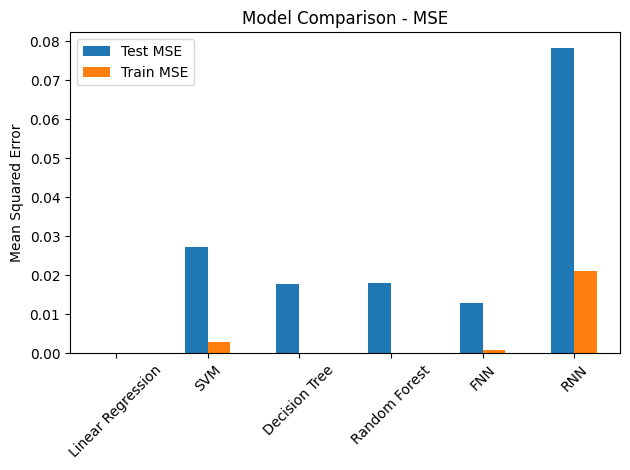

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, learning_curve # Import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization


# Define DataPreprocessor class here before train_and_evaluate_all_models
class DataPreprocessor:
  def __init__(self,file_path,symbol='ADANIPORTS',sequence_length =10):
    self.file_path = file_path
    self.symbol = symbol
    self.sequence_length = sequence_length
    self.scaler = MinMaxScaler()

  def load_data (self):
    data = pd.read_csv(self.file_path)
    stock_data = data[data['Symbol'] == self.symbol].sort_values('Date')
    # Extract features
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data['Day'] = stock_data['Date'].dt.day
    stock_data['Month'] = stock_data['Date'].dt.month
    stock_data['Dayofweek'] = stock_data['Date'].dt.dayofweek

    return stock_data

  def prepare_data(self,stock_data):
    features = ['Close', 'Volume', 'Day', 'Month', 'Dayofweek']
    target = 'Open'
    # Scale features
    scaled_features = self.scaler.fit_transform(stock_data[features])
    scaled_target = self.scaler.fit_transform(stock_data[[target]])

    # Standard format for traditional models
    X_standard = scaled_features[:-1]
    y_standard = scaled_target[1:]

    # Sequence format for RNN
    X_sequences = []
    y_sequences = []
    for i in range(len(scaled_features) - self.sequence_length):
      X_sequences.append(scaled_features[i:(i + self.sequence_length)])
      y_sequences.append(scaled_target[i + self.sequence_length])

    X_sequences = np.array(X_sequences)
    y_sequences = np.array(y_sequences)

    return {
        'standard' : (X_standard, y_standard),
        'sequence' : (X_sequences, y_sequences),
        'features' : features
    }


class Models:
    @staticmethod
    def create_fnn(input_shape, dropout_rate=0.2):
        model = Sequential([
            Dense(64, activation='relu', input_shape=input_shape,
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            BatchNormalization(),
            Dropout(dropout_rate),

            Dense(32, activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            BatchNormalization(),
            Dropout(dropout_rate),

            Dense(16, activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            BatchNormalization(),
            Dropout(dropout_rate),

            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    @staticmethod
    def create_rnn(sequence_length, n_features, dropout_rate=0.2):
        model = Sequential([
            LSTM(64, return_sequences=True,
                 input_shape=(sequence_length, n_features),
                 recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
            BatchNormalization(),
            Dropout(dropout_rate),

            LSTM(32, return_sequences=False,
                 recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
            BatchNormalization(),
            Dropout(dropout_rate),

            Dense(16, activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            BatchNormalization(),
            Dropout(dropout_rate),

            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        return model


def plot_learning_curves(model, X, y, model_name):
  train_sizes, train_scores, val_scores = learning_curve(
      model, X, y,
      train_sizes=np.linspace(0.1, 1.0,10)
  )
  train_scores_mean = -np.mean(train_scores, axis=1)
  val_scores_mean = -np.mean(val_scores, axis=1)


  plt.figure(figsize=(10,6))
  plt.plot(train_sizes, train_scores_mean,label = 'Training Error' )
  plt.plot(train_sizes, val_scores_mean, label = "Validation Error")
  plt.title(f'Learning Curves - {model_name}')
  plt.xlabel('Training Examples')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()


def train_and_evaluate_all_models(file_path, symbol='ADANIPORTS'):
    # Initialize preprocessor and load data
    preprocessor = DataPreprocessor(file_path, symbol)
    stock_data = preprocessor.load_data()
    data_dict = preprocessor.prepare_data(stock_data)

    # Split data
    X_standard, y_standard = data_dict['standard']
    X_sequence, y_sequence = data_dict['sequence']

    X_train, X_test, y_train, y_test = train_test_split(
        X_standard, y_standard, test_size=0.2, shuffle=False
    )

    X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(
        X_sequence, y_sequence, test_size=0.2, shuffle=False
    )

    # Callbacks for neural networks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=0.0001
        )
    ]

    # Initialize models with overfitting prevention
    models = {
        'Linear Regression': LinearRegression(),
        'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1),
        'Decision Tree': DecisionTreeRegressor(
            max_depth=5,
            min_samples_split=5,
            min_samples_leaf=2
        ),
        'Random Forest': RandomForestRegressor(
            n_estimators=100,
            max_depth=5,
            min_samples_split=5,
            min_samples_leaf=2,
            n_jobs=-1
        )
    }

    # Train and evaluate traditional models
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train.ravel())

        # Make predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Plot learning curves
        plot_learning_curves(model, X_standard, y_standard.ravel(), name)

        # Plot predictions
        ModelEvaluator().plot_predictions(
            y_test.ravel(),
            test_pred,
            name
        )

        # Calculate metrics
        results[name] = {
            'train': ModelEvaluator().evaluate_model(y_train, train_pred),
            'test': ModelEvaluator().evaluate_model(y_test, test_pred)
        }

    # Train and evaluate neural networks
    print("\nTraining FNN...")
    fnn = Models.create_fnn((X_train.shape[1],))
    fnn_history = fnn.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=0
    )

    ModelEvaluator.plot_training_history(fnn_history, 'FNN')
    fnn_train_pred = fnn.predict(X_train)
    fnn_test_pred = fnn.predict(X_test)

    results['FNN'] = {
        'train': ModelEvaluator.evaluate_model(y_train, fnn_train_pred),
        'test': ModelEvaluator.evaluate_model(y_test, fnn_test_pred)
    }

    print("\nTraining RNN...")
    rnn = Models.create_rnn(X_seq_train.shape[1], X_seq_train.shape[2])
    rnn_history = rnn.fit(
        X_seq_train, y_seq_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=0
    )

    ModelEvaluator.plot_training_history(rnn_history, 'RNN')
    rnn_train_pred = rnn.predict(X_seq_train)
    rnn_test_pred = rnn.predict(X_seq_test)

    results['RNN'] = {
        'train': ModelEvaluator.evaluate_model(y_seq_train, rnn_train_pred),
        'test': ModelEvaluator.evaluate_model(y_seq_test, rnn_test_pred)
    }

    # Compare all models
    comparison_df = pd.DataFrame({
        model_name: {
            f'Train {metric}': scores['train'][metric]
            for metric in ['MSE', 'RMSE', 'R2']
        } | {
            f'Test {metric}': scores['test'][metric]
            for metric in ['MSE', 'RMSE', 'R2']
        }
        for model_name, scores in results.items()
    }).T

    print("\nModel Comparison:")
    print(comparison_df)

    # Plot comparison
    plt.figure(figsize=(12, 6))
    comparison_df[['Test MSE', 'Train MSE']].plot(kind='bar')
    plt.title('Model Comparison - MSE')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return results, comparison_df

# Usage
if __name__ == "__main__":
    file_path = 'ADANIPORTS.csv'
    results, comparison = train_and_evaluate_all_models(file_path)

###Cross Validation

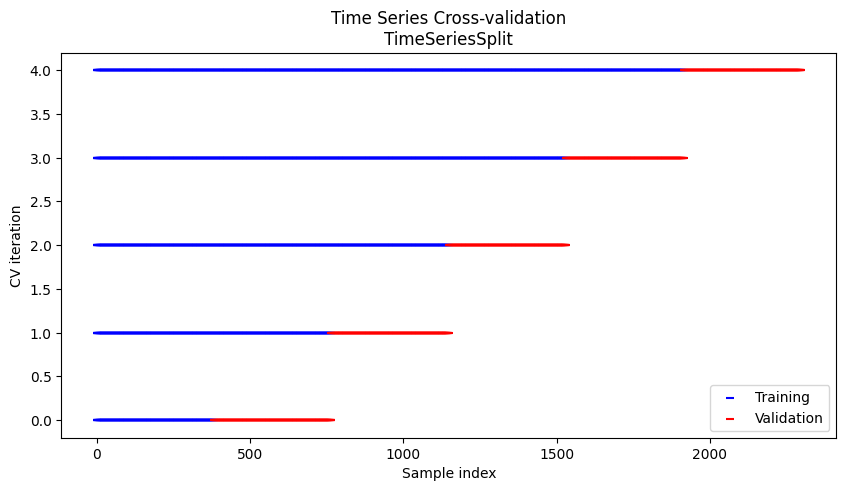


Performing cross-validation for Linear Regression...
Fold 1: MSE = 0.0000, R² = 0.9993
Fold 2: MSE = 0.0000, R² = 0.9977
Fold 3: MSE = 0.0000, R² = 0.9978
Fold 4: MSE = 0.0000, R² = 0.9861
Fold 5: MSE = 0.0001, R² = 0.9984

Performing cross-validation for SVM...
Fold 1: MSE = 0.0192, R² = -1.3589
Fold 2: MSE = 0.0060, R² = -0.2605
Fold 3: MSE = 0.0135, R² = -1.5509
Fold 4: MSE = 0.0018, R² = -0.4741
Fold 5: MSE = 0.0433, R² = -0.2945

Performing cross-validation for Decision Tree...
Fold 1: MSE = 0.0127, R² = -0.5586
Fold 2: MSE = 0.0000, R² = 0.9905
Fold 3: MSE = 0.0018, R² = 0.6623
Fold 4: MSE = 0.0000, R² = 0.9696
Fold 5: MSE = 0.0222, R² = 0.3362

Performing cross-validation for Random Forest...
Fold 1: MSE = 0.0130, R² = -0.6003
Fold 2: MSE = 0.0000, R² = 0.9933
Fold 3: MSE = 0.0018, R² = 0.6555
Fold 4: MSE = 0.0000, R² = 0.9825
Fold 5: MSE = 0.0218, R² = 0.3482

Performing cross-validation for FNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold 1: MSE = 0.0238, R² = -1.9274


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold 2: MSE = 0.0289, R² = -5.0368


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold 3: MSE = 0.0054, R² = -0.0122


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 4: MSE = 0.0015, R² = -0.2199


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 5: MSE = 0.0038, R² = 0.8849

Performing cross-validation for RNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Fold 1: MSE = 0.0449, R² = -4.3998


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Fold 2: MSE = 0.0156, R² = -2.3442


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Fold 3: MSE = 0.0060, R² = -0.1657


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Fold 4: MSE = 0.0019, R² = -0.4851


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Fold 5: MSE = 0.0210, R² = 0.3749


<ipython-input-15-e16c0b40384e>:226: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-15-e16c0b40384e>:230: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


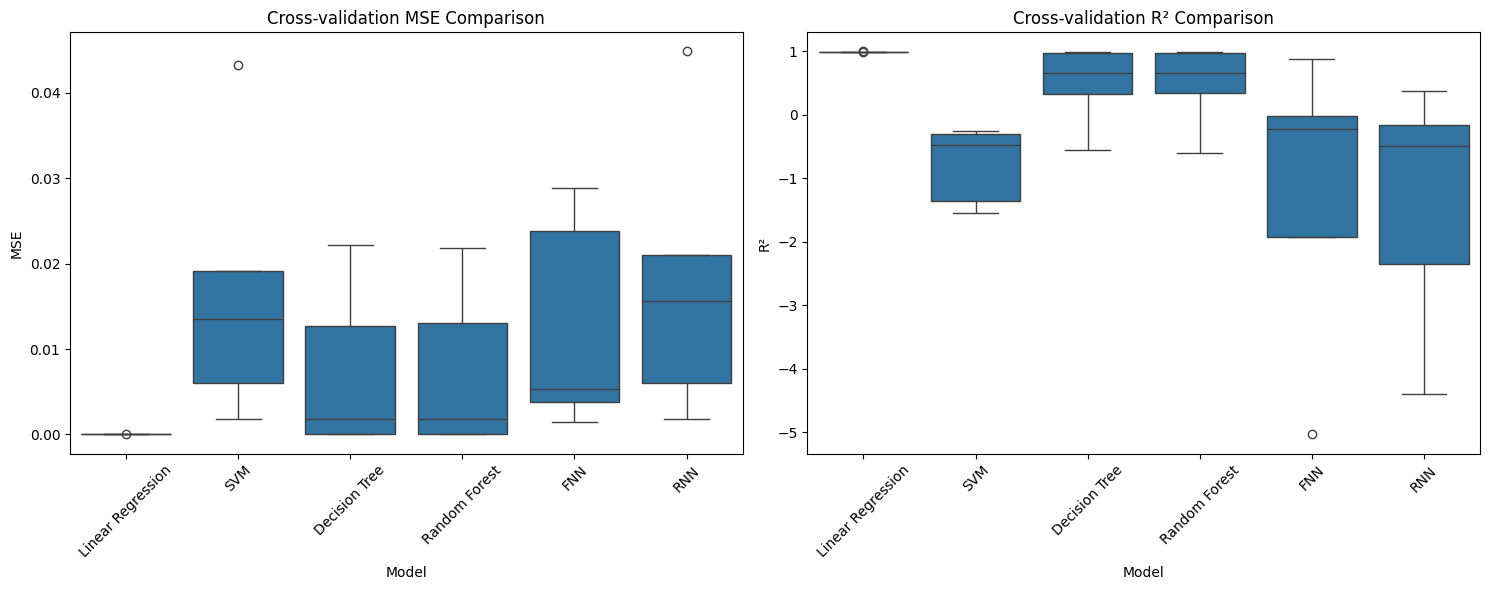


Cross-validation Summary:
                   MSE Mean   MSE Std   R² Mean    R² Std
Linear Regression  0.000020  0.000018  0.995858  0.004911
SVM                0.016776  0.014551 -0.787771  0.552874
Decision Tree      0.007349  0.008794  0.480024  0.571466
Random Forest      0.007338  0.008702  0.475832  0.588401
FNN                0.012688  0.011340 -1.262277  2.095190
RNN                0.017877  0.015104 -1.403964  1.755055


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

class DataPreprocessor:
    def __init__(self, file_path, symbol='ADANIPORTS', sequence_length=10):
        self.file_path = file_path
        self.symbol = symbol
        self.sequence_length = sequence_length
        self.scaler = MinMaxScaler()

    def load_data(self):
        data = pd.read_csv(self.file_path)
        stock_data = data[data['Symbol'] == self.symbol].sort_values('Date')

        # Extract features
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        stock_data['Day'] = stock_data['Date'].dt.day
        stock_data['Month'] = stock_data['Date'].dt.month
        stock_data['Dayofweek'] = stock_data['Date'].dt.dayofweek

        return stock_data

    def prepare_data(self, stock_data):
        features = ['High','Low','Close', 'Volume','Trades', 'Day', 'Month', 'Dayofweek']
        target = 'Open'

        # Scale features
        scaled_features = self.scaler.fit_transform(stock_data[features])
        scaled_target = self.scaler.fit_transform(stock_data[[target]])

        # Standard format for traditional models
        X_standard = scaled_features[:-1]
        y_standard = scaled_target[1:]

        # Sequence format for RNN
        X_sequences = []
        y_sequences = []
        for i in range(len(scaled_features) - self.sequence_length):
            X_sequences.append(scaled_features[i:(i + self.sequence_length)])
            y_sequences.append(scaled_target[i + self.sequence_length])

        X_sequences = np.array(X_sequences)
        y_sequences = np.array(y_sequences)

        return {
            'standard': (X_standard, y_standard),
            'sequence': (X_sequences, y_sequences),
            'features': features
        }

class Models:
    @staticmethod
    def create_fnn(input_shape, dropout_rate=0.2):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape,
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),

            tf.keras.layers.Dense(32, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),

            tf.keras.layers.Dense(16, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),

            tf.keras.layers.Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    @staticmethod
    def create_rnn(sequence_length, n_features, dropout_rate=0.2):
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(64, return_sequences=True,
                               input_shape=(sequence_length, n_features),
                               recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),

            tf.keras.layers.LSTM(32, return_sequences=False,
                               recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),

            tf.keras.layers.Dense(16, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),

            tf.keras.layers.Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

class ModelEvaluator:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits
        self.tscv = TimeSeriesSplit(n_splits=n_splits)
        self.scores = {}

    def plot_training_history(self, history, title):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{title} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()

    def plot_predictions(self, y_true, y_pred, title):
        plt.figure(figsize=(10, 6))
        plt.plot(y_true, label='Actual', alpha=0.7)
        plt.plot(y_pred, label='Predicted', alpha=0.7)
        plt.title(f'{title} - Predictions vs Actual')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    def plot_cv_indices(self, X, title):
        fig, ax = plt.subplots(figsize=(10, 5))
        for i, (train_idx, val_idx) in enumerate(self.tscv.split(X)):
            train = ax.scatter(train_idx, [i] * len(train_idx),
                             c='blue', marker='_', label='Training' if i == 0 else "")
            val = ax.scatter(val_idx, [i] * len(val_idx),
                           c='red', marker='_', label='Validation' if i == 0 else "")
        ax.set(title=f'{title}\nTimeSeriesSplit',
               xlabel='Sample index', ylabel='CV iteration')
        ax.legend()
        plt.show()

    def perform_cv(self, model_creator, X, y, model_name, is_neural=False):
        cv_scores_mse = []
        cv_scores_r2 = []

        print(f"\nPerforming cross-validation for {model_name}...")

        for fold, (train_idx, val_idx) in enumerate(self.tscv.split(X)):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            if is_neural:
                if model_name == 'RNN':
                    model = model_creator(X_train.shape[1], X_train.shape[2])
                else:
                    model = model_creator((X_train.shape[1],))

                callbacks = [
                    tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=10,
                        restore_best_weights=True
                    ),
                    tf.keras.callbacks.ReduceLROnPlateau(
                        monitor='val_loss',
                        factor=0.5,
                        patience=5,
                        min_lr=0.0001
                    )
                ]

                model.fit(
                    X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks,
                    verbose=0
                )
            else:
                model = model_creator()
                model.fit(X_train, y_train.ravel())

            y_pred = model.predict(X_val)
            if is_neural:
                y_pred = y_pred.ravel()

            mse = mean_squared_error(y_val, y_pred)
            r2 = r2_score(y_val, y_pred)

            cv_scores_mse.append(mse)
            cv_scores_r2.append(r2)

            print(f"Fold {fold + 1}: MSE = {mse:.4f}, R² = {r2:.4f}")

        self.scores[model_name] = {
            'mse': cv_scores_mse,
            'r2': cv_scores_r2
        }

        return np.mean(cv_scores_mse), np.mean(cv_scores_r2)

    def plot_cv_results(self):
        mse_data = []
        r2_data = []

        for model_name, scores in self.scores.items():
            mse_data.extend([(model_name, score) for score in scores['mse']])
            r2_data.extend([(model_name, score) for score in scores['r2']])

        mse_df = pd.DataFrame(mse_data, columns=['Model', 'MSE'])
        r2_df = pd.DataFrame(r2_data, columns=['Model', 'R²'])

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        sns.boxplot(x='Model', y='MSE', data=mse_df, ax=ax1)
        ax1.set_title('Cross-validation MSE Comparison')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

        sns.boxplot(x='Model', y='R²', data=r2_df, ax=ax2)
        ax2.set_title('Cross-validation R² Comparison')
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

        plt.tight_layout()
        plt.show()

        print("\nCross-validation Summary:")
        summary = pd.DataFrame({
            'MSE Mean': {model: np.mean(scores['mse']) for model, scores in self.scores.items()},
            'MSE Std': {model: np.std(scores['mse']) for model, scores in self.scores.items()},
            'R² Mean': {model: np.mean(scores['r2']) for model, scores in self.scores.items()},
            'R² Std': {model: np.std(scores['r2']) for model, scores in self.scores.items()}
        })
        print(summary)

def run_complete_analysis(file_path, symbol='ADANIPORTS'):
    # Initialize preprocessor and load data
    preprocessor = DataPreprocessor(file_path, symbol)
    stock_data = preprocessor.load_data()
    data_dict = preprocessor.prepare_data(stock_data)

    X_standard, y_standard = data_dict['standard']
    X_sequence, y_sequence = data_dict['sequence']

    # Initialize evaluator
    evaluator = ModelEvaluator(n_splits=5)

    # Plot CV indices
    evaluator.plot_cv_indices(X_standard, "Time Series Cross-validation")

    # Define traditional models
    models = {
        'Linear Regression': lambda: LinearRegression(),
        'SVM': lambda: SVR(kernel='rbf', C=1.0, epsilon=0.1),
        'Decision Tree': lambda: DecisionTreeRegressor(
            max_depth=5,
            min_samples_split=5,
            min_samples_leaf=2
        ),
        'Random Forest': lambda: RandomForestRegressor(
            n_estimators=100,
            max_depth=5,
            min_samples_split=5,
            min_samples_leaf=2,
            n_jobs=-1
        )
    }

    # Perform CV for traditional models
    for name, model_creator in models.items():
        evaluator.perform_cv(model_creator, X_standard, y_standard, name)

    # Perform CV for neural networks
    evaluator.perform_cv(Models.create_fnn, X_standard, y_standard, 'FNN', is_neural=True)
    evaluator.perform_cv(Models.create_rnn, X_sequence, y_sequence, 'RNN', is_neural=True)

    # Plot and summarize results
    evaluator.plot_cv_results()

    return evaluator

# Usage
if __name__ == "__main__":
    file_path = 'ADANIPORTS.csv'
    results = run_complete_analysis(file_path)

### Overfit prevention and comparison

Linear Regression (Default): MSE = 0.0000, MAE = 0.0038
Ridge Regression: MSE = 0.0034, MAE = 0.0451
Lasso Regression: MSE = 0.0662, MAE = 0.1968
Random Forest (Default): MSE = 0.0165, MAE = 0.0526
Random Forest (Tuned): MSE = 0.0165, MAE = 0.0525
Decision Tree (Default): MSE = 0.0158, MAE = 0.0520
Decision Tree (Tuned): MSE = 0.0169, MAE = 0.0540
SVM (Default): MSE = 0.0273, MAE = 0.0958
SVM (Tuned): MSE = 0.0281, MAE = 0.1011


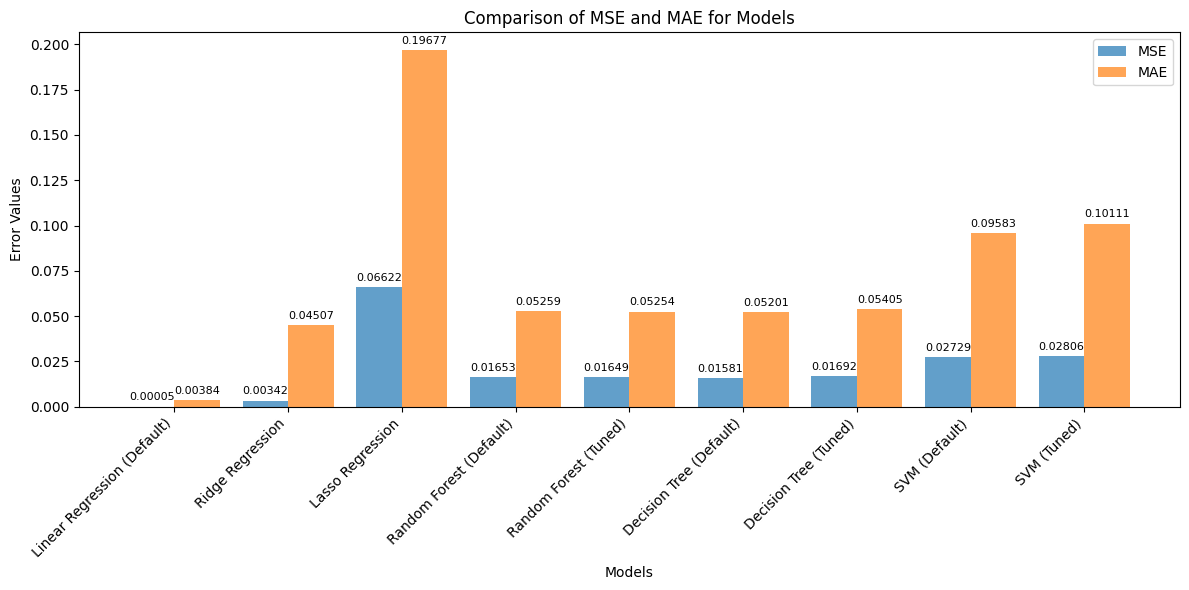

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso

def run_model_comparison(file_path, symbol='ADANIPORTS', test_size=0.2):
    # Preprocess data
    preprocessor = DataPreprocessor(file_path, symbol)
    stock_data = preprocessor.load_data()
    data_dict = preprocessor.prepare_data(stock_data)

    X, y = data_dict['standard']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Define models (default and tuned versions)
    models = {
        'Linear Regression (Default)': LinearRegression(),
        'Ridge Regression' : Ridge(alpha=10.0),
        'Lasso Regression' : Lasso(alpha=0.1),
        'Random Forest (Default)': RandomForestRegressor(),
        'Random Forest (Tuned)': RandomForestRegressor(
            n_estimators=100,
            max_depth=50,
            # min_samples_split=5,
            # min_samples_leaf=2,
            # n_jobs=-1
        ),
        'Decision Tree (Default)': DecisionTreeRegressor(),
        'Decision Tree (Tuned)': DecisionTreeRegressor(
            max_depth=50,
            min_samples_split=4,
            min_samples_leaf=2
        ),
        'SVM (Default)': SVR(),
        'SVM (Tuned)': SVR( kernel='rbf', C=0.1, epsilon=0.1),
    }

    # Store results
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {'MSE': mse, 'MAE': mae}

        print(f"{name}: MSE = {mse:.4f}, MAE = {mae:.4f}")

    # Plot results
    plot_results(results)

def plot_results(results):
    # Prepare data for plotting
    mse_values = {name: metrics['MSE'] for name, metrics in results.items()}
    mae_values = {name: metrics['MAE'] for name, metrics in results.items()}

    models = list(mse_values.keys())
    mse_scores = list(mse_values.values())
    mae_scores = list(mae_values.values())

    x = np.arange(len(models))
    width = 0.4

    # Plot MSE and MAE
    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, mse_scores, width, label='MSE', alpha=0.7)
    bars2 = ax.bar(x + width/2, mae_scores, width, label='MAE', alpha=0.7)

    # Add labels and titles
    ax.set_xlabel('Models')
    ax.set_ylabel('Error Values')
    ax.set_title('Comparison of MSE and MAE for Models')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend()

    # Add values on top of bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset text by 3 points
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Usage
if __name__ == "__main__":
    file_path = 'ADANIPORTS.csv'
    run_model_comparison(file_path)

#**Question 3:**

##Preprocessing:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


class WineQualityLSTMClassifier:
    def __init__(self, file_path='winequality-red.csv', test_size=0.2, random_state=42):
        """
        Initializes the WineQualityLSTMClassifier.

        Args:
            file_path (str): Path to the wine quality dataset file.
            test_size (float): Proportion of the dataset to include in the test split.
            random_state (int): Random state for reproducibility.
        """
        self.file_path = file_path
        self.test_size = test_size
        self.random_state = random_state
        self.encoder = LabelEncoder()
        self.scaler = StandardScaler()
        self.model = None
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None

    def load_and_preprocess_data(self):
        """Loads and preprocesses the wine quality dataset."""
        # Load the dataset.
        df = pd.read_csv(self.file_path, sep=';')

        # Separate features (X) and target (y).
        X = df.drop('quality', axis=1)
        y = df['quality']

        # Encode the target variable.
        y = self.encoder.fit_transform(y)
        y = to_categorical(y)  # One-hot encode

        # Scale features.
        X = self.scaler.fit_transform(X)

        # Split data into training and testing sets.
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )

        # Reshape input data for LSTM.
        self.X_train = self.X_train.reshape(self.X_train.shape[0], 1, self.X_train.shape[1])
        self.X_test = self.X_test.reshape(self.X_test.shape[0], 1, self.X_test.shape[1])

    def build_model(self, lstm_units=64, dense_units=32, dropout_rate=0.2):
        """Builds the LSTM model."""
        self.model = Sequential()
        self.model.add(LSTM(lstm_units, input_shape=(self.X_train.shape[1], self.X_train.shape[2]),
                           activation='tanh', return_sequences=False))
        self.model.add(Dropout(dropout_rate))
        self.model.add(Dense(dense_units, activation='relu'))
        self.model.add(Dropout(dropout_rate))
        self.model.add(Dense(self.y_train.shape[1], activation='softmax'))  # Output layer
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    def train_model(self, epochs=50, batch_size=32):
        """Trains the LSTM model."""
        return self.model.fit(self.X_train, self.y_train, epochs=epochs, batch_size=batch_size,
                      validation_split=0.2, verbose=1)

    def evaluate_model(self):
        """Evaluates the model on the test set."""
        loss, accuracy = self.model.evaluate(self.X_test, self.y_test, verbose=0)
        print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
        return loss, accuracy

    def predict(self, X):
        return np.argmax(self.model.predict(X),axis=1)

    def plot_training(self, history):
        """Plots the training and validation accuracy curves."""
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Training and Validation Accuracy')
        plt.show()

    def evaluate_performance(self, y_true, y_pred):
        """Evaluates the model's performance using confusion matrix and classification report."""
        # Convert one-hot encoded y_true back to class labels
        y_true_labels = np.argmax(y_true, axis=1)

        # Assuming y_pred already contains class labels (not probabilities)
        conf_matrix = confusion_matrix(y_true_labels, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)

        class_report = classification_report(y_true_labels, y_pred)
        print("Classification Report:")
        print(class_report)


###Evaluate model

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4114 - loss: 1.7199 - val_accuracy: 0.6367 - val_loss: 1.5304
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5617 - loss: 1.4894 - val_accuracy: 0.6562 - val_loss: 1.2498
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5865 - loss: 1.2230 - val_accuracy: 0.6484 - val_loss: 1.0385
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5403 - loss: 1.1323 - val_accuracy: 0.6523 - val_loss: 0.9482
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5888 - loss: 1.0585 - val_accuracy: 0.6797 - val_loss: 0.9074
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5957 - loss: 1.0151 - val_accuracy: 0.6914 - val_loss: 0.8912
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 1.0420 - val_accuracy: 0.6836 - val_loss: 0.8748
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6017 - loss: 0.9808 - val_accuracy: 0.6719 - val_loss: 0.8699
Ep

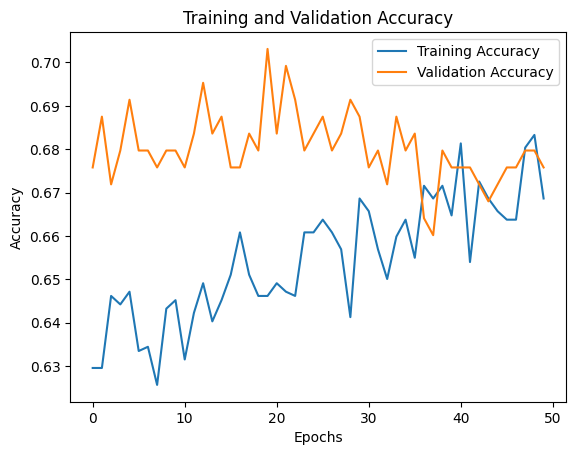

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  3 95 31  1  0]
 [ 0  0 42 77 13  0]
 [ 0  1  1 18 22  0]
 [ 0  0  0  0  5  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.64      0.73      0.68       130
           3       0.61      0.58      0.60       132
           4       0.54      0.52      0.53        42
           5       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.30      0.31      0.30       320
weighted avg       0.58      0.61      0.59       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Create an instance of the classifier.
classifier = WineQualityLSTMClassifier()

# Load and preprocess the data.
classifier.load_and_preprocess_data()

# Build the LSTM model.
classifier.build_model()

# Train the model.
classifier.train_model(epochs=50, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model.
loss, accuracy = classifier.evaluate_model()

#Predict values
y_pred = classifier.predict(classifier.X_test)

# Train the model and get the training history
history = classifier.train_model(epochs=50, batch_size=32)

# Plot the training curves
classifier.plot_training(history)

# Get predictions on the test set
y_pred = classifier.predict(classifier.X_test)

# Evaluate the model's performance
classifier.evaluate_performance(classifier.y_test, y_pred)